# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?



--------------
## **Context: Why is this problem important to solve?<br>**
--------------

Malaria is a serious and life-threatening disease caused by Plasmodium parasites, transmitted through the bites of infected female Anopheles mosquitoes. The disease affects nearly half of the world's population, with over 229 million cases and 400,000 deaths reported globally in 2019. Young children are particularly vulnerable, accounting for a significant proportion of malaria-related deaths. Traditional methods of malaria diagnosis are labor-intensive, time-consuming, and subject to human error. An accurate, automated detection system which can enhance early  and precise diagnosis  can reduce transmission and potentially reduce mortality rates.  
Diferent automatic image recognition systems based on machine learning have been developed to detect malaria parasites have been reported, but clinical diagnosis remains challenging.

----------------
## **Objective: What is the intended goal?**
----------------
The primary objective is to develop a computer vision model using Convolutional Neural Networks (CNNs) to automatically detect malaria from microscopic images of red blood cells (RBCs). By leveraging deep learning techniques, the model aims to accurately classify RBC images as either parasitized (infected with Plasmodium parasites) or uninfected, thereby facilitating early and precise diagnosis of malaria..

-------------
## **The key questions:** What are the key questions that need to be answered?
-------------

1.How can the collected data be preprocessed to ensure consistency, quality, and suitability for training the CNN model?
2. Which CNN architectures are most appropriate for classifying parasitized and uninfected RBC images?
3. What hyperparameters need to be tuned to optimize the training process and improve the model's generalization ability?
4. What specific techniques, such as transfromation,  data augmentation or transfer learning, that can enhance the model's robustness and ability to generalize to unseen data?
5. Which evaluation metrics (e.g., accuracy, precision, recall, F1-score) should be used to assess the performance of the trained model?
6. What strategies should be employed to deploy the model effectively in clinical workflows, ensuring seamless integration into existing diagnostic processes and healthcare systems?
7.Are there ethical considerations and regulatory requirements that need to be addressed regarding the use of patient data and the potential impact of the model on healthcare practices


--------------
## **The problem formulation:** What is it that we are trying to solve using data science?
--------------


Malaria is a life-threatening disease and a significant health concern, particularly in tropical regions with limited health-monitoring infrastructure. While microscopic examination of blood smears has been the gold standard for decades due to its relatively low cost, it suffers from sensitivity issues, it is labor intensity, and it requires well-trained personnel. Accurate and specific diagnostic methods are crucial for managing malaria epidemics effectively, ensuring timely and proper treatment. Computer vision models  present promising opportunities to enhance the accuracy, efficiency, and accessibility of malaria diagnostics, ultimately leading to better patient outcomes and improved control efforts



--------------
## **Data Description**
--------------

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>

###<b> Mount the Drive

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import random

# For Data Visualization
import cv2
import seaborn as sns
# For Model Building

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

##### **First let just look at directories in zip file**

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

##### **Extract Folder**

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/ Malaria Detection based on the domain - Deep Learning/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

##### **Calculate average size of  train images**

In [ ]:
import os
import cv2

train_datdir_parasitized= "/content/cell_images/train/parasitized"
train_datdir_uninfected= "/content/cell_images/train/uninfected"

test_datdir_parasitized= "/content/cell_images/test/parasitized"
test_datdir_uninfected= "/content/cell_images/test/uninfected"

# Function to calculate the average size of images in a directory
def calculate_average_size(datadir):
    total_height = 0
    total_width = 0
    total_images = 0

    # Iterate through each image in the directory
    for filename in os.listdir(datadir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(datadir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                height, width, _ = img.shape
                total_height += height
                total_width += width
                total_images += 1

    # Calculate average height and width
    average_height = total_height / total_images
    average_width = total_width / total_images

    return average_height, average_width

# Calculate average size of  train images in the training parasitized and uninfected
average_height_train_parasitized, average_width_train_parasitized = calculate_average_size(train_datdir_parasitized)
average_height_train_uninfected, average_width_train_uninfected = calculate_average_size(train_datdir_uninfected)

print("Average Height  (Train_parasitized):", average_height_train_parasitized)
print("Average Width (Train_parasitized):", average_width_train_parasitized)
print("Average Height (Train_uninfected):", average_height_train_uninfected)
print("Average Width (Train_uninfected):", average_width_train_uninfected)

# Calculate average size of test images in the training parasitized and uninfected

average_height_test_parasitized, average_width_test_parasitized = calculate_average_size(test_datdir_parasitized)
average_height_test_uninfected, average_width_test_uninfected = calculate_average_size(test_datdir_uninfected)

print("Average Height  (Test_parasitized):", average_height_test_parasitized)
print("Average Width (Test_parasitized):", average_width_test_parasitized)
print("Average Height (Test_uninfected):", average_height_test_uninfected)
print("Average Width (Test_uninfected):", average_width_test_uninfected)



Average Height  (Train_parasitized): 134.58321411540297
Average Width (Train_parasitized): 133.75894134477826
Average Height (Train_uninfected): 131.37540400775694
Average Width (Train_uninfected): 130.99870717517777
Average Height  (Test_parasitized): 134.95923076923077
Average Width (Test_parasitized): 135.47846153846154
Average Height (Test_uninfected): 130.83307692307693
Average Width (Test_uninfected): 131.35692307692307


**Observations**:

Based on the analysis of average image dimensions, resizing all images to approximately 134x134 pixels is a reasonable choice, ensuring uniformity and enhancing the CNN's performance and accuracy in detecting parasitized and uninfected images. While 134x134 pixels preserve more details, improving model accuracy, they also increase computational demands, training times, and the risk of overfitting. Thus, the choice of image size should balance the need for detail with available resources and model goals.

Given these considerations, resizing to 64x64 pixels is a practical choice for several reasons:

1. Computational Efficiency: Smaller images significantly reduce the computational load and memory usage, making it feasible to handle larger datasets and train models faster.

2. Training Speed: Reduced image dimensions lead to quicker training times, allowing for more efficient experimentation and model tuning.

3. Sufficient Detail: Despite the reduction in size, 64x64 pixels still retain essential features and patterns necessary for the CNN to differentiate between parasitized and uninfected images effectively.

4. Resource Constraints: For environments with limited computational resources, using smaller images ensures the process remains manageable and cost-effective.

In conclusion, while 134x134 pixels offer more detail, resizing to 64x64 pixels strikes a balance between preserving necessary image features and optimizing for computational efficiency, making it a suitable choice for training the CNN.

#####**Creating a list** where **each item is a tuple** containing **the resized image as a NumPy array** and the **corresponding label** (an integer representing the category)**

In [4]:

TRAIN_DATADIR= "/content/cell_images/train"
TEST_DATADIR ="/content/cell_images/test"

# Storing all the categories in 'CATEGORIES' variable
CATEGORIES = ["parasitized", "uninfected"]

# Defining the size of the image to 64
IMG_SIZE = 64

# Function to create training data
def create_data(DATADIR):
    data = []     # store image data and their corresponding labels.
    label_map = {category: idx for idx, category in enumerate(CATEGORIES)}  # Dictionary is created to map category names to numeric labels (0 for "parasitized", 1 for "uninfected").
    for category in CATEGORIES:            # For each category, construct the path to that category's directory.
        path = os.path.join(DATADIR, category)
        if not os.path.exists(path):       # Checks if the directory exists. If it does not exist, it prints a warning and continues to the next category.
            print(f"Directory {path} does not exist!")
            continue
        class_num = label_map[category]  # Use the numeric label
        for img in os.listdir(path):     # For each image in the list of all images in the directory path (category directory: "parasitized" or "uninfected")
            try:
                img_array = cv2.imread(os.path.join(path, img)) # Joining the directory path  with the image file, Read the image file into a NumPy array
                if img_array is not None:
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Resizing the image
                    data.append([new_array, class_num])  # Appending both the image and its label
                else:
                    print(f"Failed to read {img}")
            except Exception as e:
                print(f"Error processing {img}: {e}")
    return data

# Creating training data
training_data = create_data(TRAIN_DATADIR)
# Creating testing data
testing_data = create_data(TEST_DATADIR)

# Print the number of images loaded for verification
print(f"Number of training images: {len(training_data)}")
print(f"Number of testing images: {len(testing_data)}")


Number of training images: 24958
Number of testing images: 2600


In [5]:
# Creating two different lists to store the Numpy arrays and the corresponding labels for train data

X_train = []
y_train = []

np.random.shuffle(training_data)                                               # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in training_data:                                          # Iterating over the training data which is generated from the create_training_data() function
    X_train.append(features)                                                   # Appending images into X_train
    y_train.append(label)                                                      # Appending labels into y_train

In [6]:
#  Creating two different lists to store the Numpy arrays and the corresponding labels for train data

X_test = []
y_test = []

np.random.shuffle(testing_data)                                                # Shuffling data to reduce variance and making sure that model remains general and overfit less
for features, label in testing_data:                                           # Iterating over the training data which is generated from the create_testing_data() function
    X_test.append(features)                                                    # Appending images into X_test
    y_test.append(label)                                                       # Appending labels into y_test

In [7]:
# Converting the pixel values into Numpy array

X_train = np.array(X_train)
X_test = np.array(X_test)

In [8]:
# Converting the label lists into DataFrames

y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object)
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

###<b> Check the shape of train and test images

In [9]:
# Print the shape of train images
print("Shape of train images:", X_train.shape)
# Print the shape of test images
print("Shape of test images:", X_test.shape)

Shape of train images: (24958, 64, 64, 3)
Shape of test images: (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [10]:
# Print the shape of train labels
print("Shape of train lables:", y_train.shape)
# Print the shape of test labes
print("Shape of test lables:", y_test.shape)

Shape of train lables: (24958, 1)
Shape of test lables: (2600, 1)


####<b> Observations and insights:
###### 1. Train and test folders were loaded and resized to 64x64.
###### 2. Labels are numeric (0 for "parasitized", 1 for "uninfected").
###### 3. Both train and test image shapes are 4D, with sample size, 64 by 64 pixels of height and width and 3 color channels.
###### 4. There are 2,4958 train and 2,600 test images and the number of images matches the number of labels.





### <b>Check the minimum and maximum range of pixel values for train and test images

In [11]:
# Check minimum and maximum pixel values for train images
min_pixel_value_train = np.min(X_train)
max_pixel_value_train = np.max(X_train)

print(f"Minimum pixel value in train images: {min_pixel_value_train}")
print(f"Maximum pixel value in train images: {max_pixel_value_train}")

# Check minimum and maximum pixel values for test images
min_pixel_value_test = np.min(X_test)
max_pixel_value_test = np.max(X_test)

print(f"Minimum pixel value in test images: {min_pixel_value_test}")
print(f"Maximum pixel value in test images: {max_pixel_value_test}")


Minimum pixel value in train images: 0
Maximum pixel value in train images: 255
Minimum pixel value in test images: 0
Maximum pixel value in test images: 255


####<b> Observations and insights:
##### The pixel values in both the train and test images range from 0 to 255.


*   To improve the performance of the model, speed of convergence, numerica stability and consistency across datasets, normalization of pixel values to a similar scale will be needed.


###<b> Count the number of values in both uninfected and parasitized

In [12]:
# Count the number of values in each category in train
value_counts_train = y_train["Label"].value_counts()

# Print the counts
print("Number of uninfected images (train):", value_counts_train.get(0, 0))
print("Number of parasitized images (train):", value_counts_train.get(1, 0))

# Count the number of values in each category in test
value_counts_test = y_test["Label"].value_counts()

# Print the counts
print("Number of uninfected images (test):", value_counts_test.get(0, 0))
print("Number of parasitized images (test):", value_counts_test.get(1, 0))


Number of uninfected images (train): 12582
Number of parasitized images (train): 12376
Number of uninfected images (test): 1300
Number of parasitized images (test): 1300


###<b>Normalize the images

In [13]:
# Normalize the training images
X_train_normalized = (X_train / 255.0).astype('float32')

# Normalize the testing images
X_test_normalized = (X_test / 255.0).astype('float32')

# Print the shape and range of normalized images to verify
print("Shape of normalized train images:", X_train_normalized.shape)
print("Range of normalized train images: [{:.5f}, {:.5f}]".format(
    np.min(X_train_normalized), np.max(X_train_normalized)))

print("\nShape of normalized test images:", X_test_normalized.shape)
print("Range of normalized test images: [{:.5f}, {:.5f}]".format(
    np.min(X_test_normalized), np.max(X_test_normalized)))

Shape of normalized train images: (24958, 64, 64, 3)
Range of normalized train images: [0.00000, 1.00000]

Shape of normalized test images: (2600, 64, 64, 3)
Range of normalized test images: [0.00000, 1.00000]


####<b> Observations and insights:

#####  Normalization of pixel values typically involves scaling the pixel values to a common range, such as [0, 1] or [-1, 1], to ensure consistency across images. This normalization process is **important for several reasons, including improving convergence during training, enhancing stability, increasing robustness to variations in lighting and color, facilitating interpretation of features, and preventing biases in the model**. Normalization of pixel values in images is a critical preprocessing step in machine learning tasks involving image data, **ensuring that models can effectively learn from and generalize to different images while avoiding issues such as slow convergence, unstable training, and biased predictions.**

##### 1. The normalized train images have a shape of (24958, 64, 64, 3), indicating a total of 24,958 images in the training set. Each image has dimensions of 64x64 pixels with three color channels (RGB).
##### 2.The pixel values in the normalized train images fall within the range [0.00000, 1.00000], indicating that the images have been successfully normalized to values between 0 and 1.
##### 3. The normalized test images have a shape of (2600, 64, 64, 3), comprising 2,600 images in the test set. Like the training images, each test image has dimensions of 64x64 pixels with three color channels.
##### 4. The fact that both the train and test images have been normalized to the same range suggests consistency in the preprocessing pipeline across both datasets.
##### 5. While the range of pixel values indicates normalization, it's

*   While the range of pixel values indicates normalization, it's important to note that standardization (mean-centered and scaled) could further enhance model performance, particularly in scenarios where there are variations in lighting or color intensity across images.

###<b> Plot to check if the data is balanced

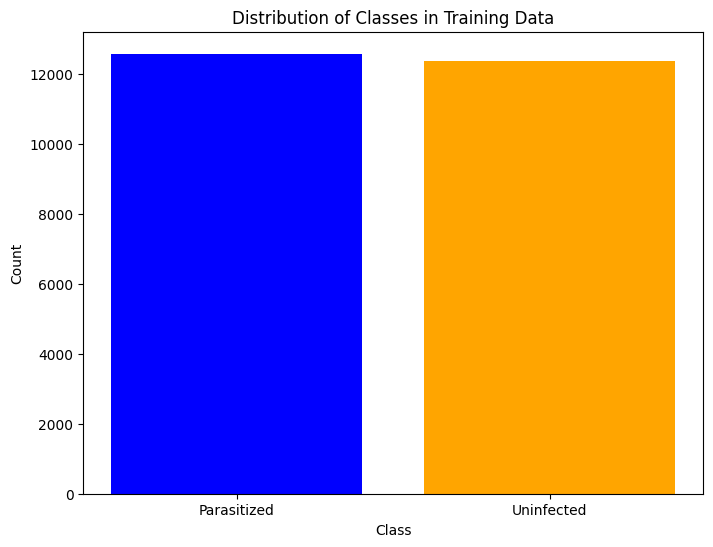

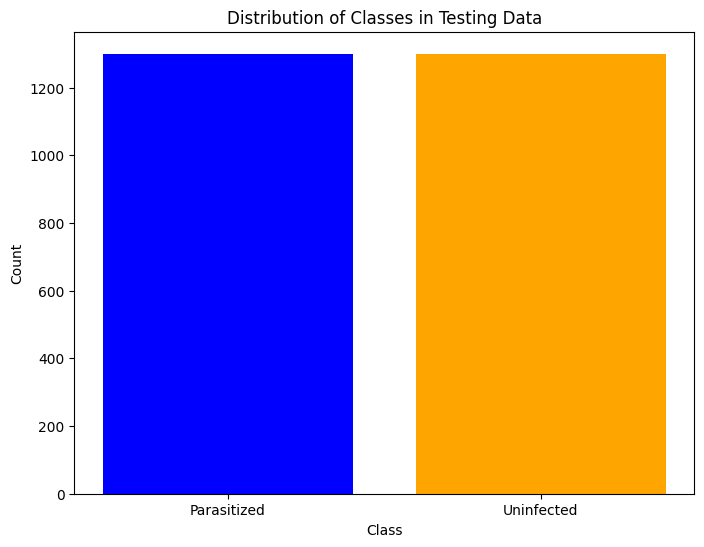

In [ ]:
 # Ensure labels are integers
y_train["Label"] = y_train["Label"].astype(int)
y_test["Label"] = y_test["Label"].astype(int)

# Count the number of values in each category for training data
value_counts_train = y_train["Label"].value_counts()

# Plot the distribution of classes for training data
plt.figure(figsize=(8, 6))
plt.bar(value_counts_train.index, value_counts_train.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.xticks(value_counts_train.index, ['Parasitized', 'Uninfected'])
plt.show()

# Count the number of values in each category for testing data
value_counts_test = y_test["Label"].value_counts()

# Plot the distribution of classes for testing data
plt.figure(figsize=(8, 6))
plt.bar(value_counts_test.index, value_counts_test.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in Testing Data')
plt.xticks(value_counts_test.index, ['Parasitized', 'Uninfected'])
plt.show()

####<b> Observations and insights:
##### Having balanced training and test datasets is crucial for ensuring the fairness and reliability of machine learning models. It is essential for building fair, reliable, and generalizable machine learning models,  ensuring  that the model learns from a diverse range of examples and makes predictions that are unbiased and accurate across all classes.


*   The training and test datasets are balance.





### <b>Exploratory Image Analysis</b>
Let's visualize the images from the train data

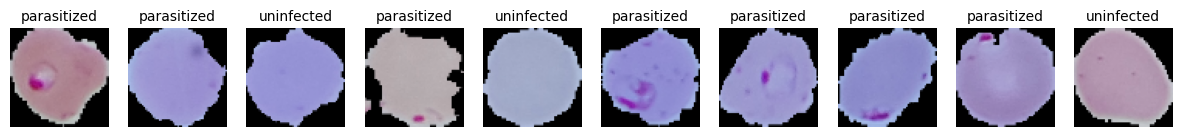

In [ ]:


# Set a random seed for reproducibility
np.random.seed(42)

# Define class labels (0 for "parasitized", 1 for "uninfected")
class_labels = ["parasitized", "uninfected"]

# Randomly select 10 indices from the training data
random_indices = np.random.choice(len(X_train), size=10, replace=False)

# Visualize the selected images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[idx], cmap='gray')  # Display the image
    plt.title(class_labels[y_train.iloc[idx][0]], fontsize=10)  # Get the corresponding label and set it as the title
    plt.axis('off')
plt.show()

####<b> Observations and insights:

##### Parasitized red blood cells (RBCs) exhibit a purple coloured ring / oval structure structure which is the parasite afftected region indicating a **possible color-based detection**.

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

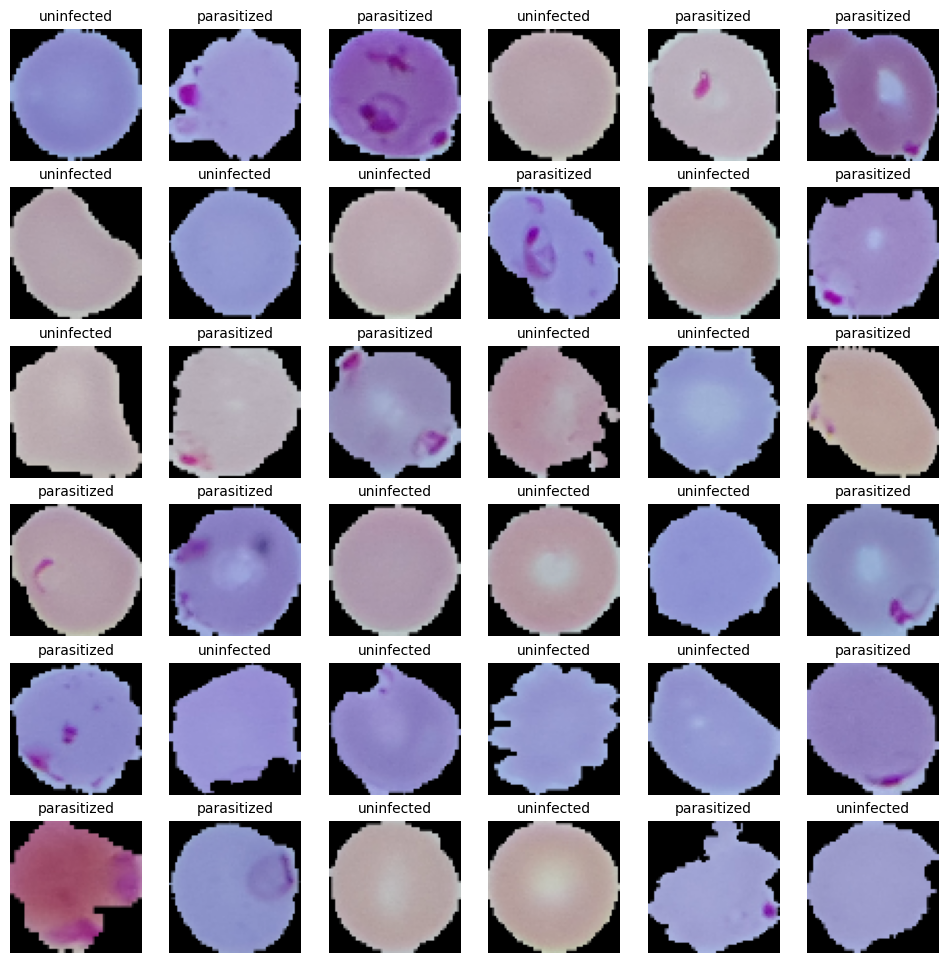

In [ ]:

# Set a random seed for reproducibility
np.random.seed(42)

# Define class labels (0 for "parasitized", 1 for "uninfected")
class_labels = ["parasitized", "uninfected"]

# Randomly select 10 indices from the training data
random_indices = np.random.choice(len(X_train), size=36, replace=False)

# Visualize the selected images
plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_indices):
    plt.subplot(6, 6, i + 1)
    plt.imshow(X_train[idx], cmap='gray')  # Display the image
    plt.title(class_labels[y_train.iloc[idx][0]],fontsize=10)  # Get the corresponding label and set it as the title
    plt.axis('off')
plt.show()

####<b>Observations and insights:

##### A closer look reveals that paresites stuctures varie in size, structure and  may be affected by variations in hue and brightness, leading to differences in signal strength across images.  

*   To address these challenges, a conversion to the HSV (Hue, Saturation, Value) color space can offer increased robustness to lighting variations and shadows.
*   By leveraging the HSV color space, it migth become possible to decouple the effects of lighting variations from the color information, allowing for more robust analysis of malaria-infected cells. This approach can enhance the detection and characterization of parasites across images with varying illumination conditions, ultimately contributing to more accurate diagnosis and classification of malaria-infected cells.



###<b> Plotting the mean images for parasitized and uninfected

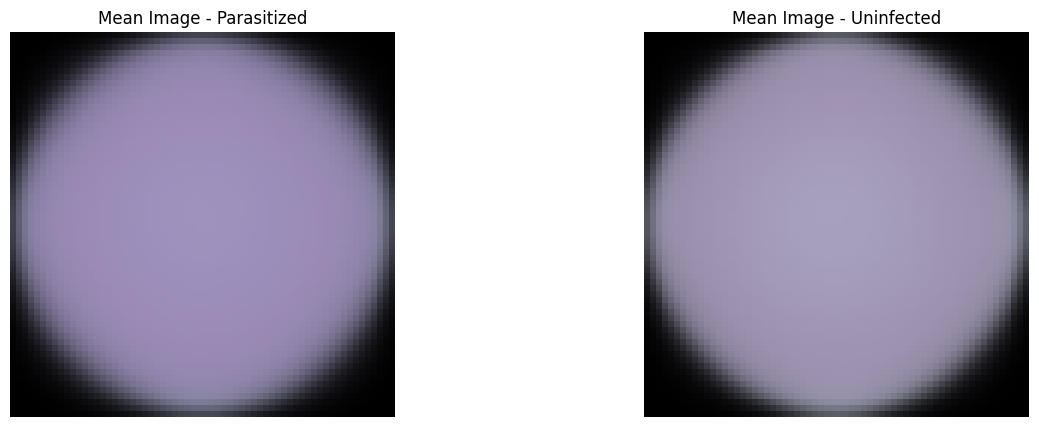

In [14]:

# Convert y_train and y_test to numpy arrays
y_train = y_train.values
y_test = y_test.values

# Calculate mean images for parasitized and uninfected
mean_parasitized = X_train_normalized[y_train.flatten() == 0].mean(axis=0)
mean_uninfected = X_train_normalized[y_train.flatten() == 1].mean(axis=0)

# Plotting the mean images
plt.figure(figsize=(15, 5))

# Mean image for parasitized
plt.subplot(1, 2, 1)
plt.imshow(mean_parasitized, cmap='gray')
plt.title('Mean Image - Parasitized')
plt.axis('off')

# Mean image for uninfected
plt.subplot(1, 2, 2)
plt.imshow(mean_uninfected, cmap='gray')
plt.title('Mean Image - Uninfected')
plt.axis('off')

plt.show()

####<b> Observations and insights:

###### Visualizing the mean image revealed a slight distinct difference in color intensity between parasitized and uninfected samples. The mean image for parasitized samples exhibited more intense hue compared to the mean image for uninfected samples.
###### This observation underscores the importance of color as a prominent feature for distinguishing between parasitized and uninfected samples in the dataset. Understanding these visual cues can aid in the design of effective models or features tailored to exploit color-based information for accurate classification of malaria-infected cells.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

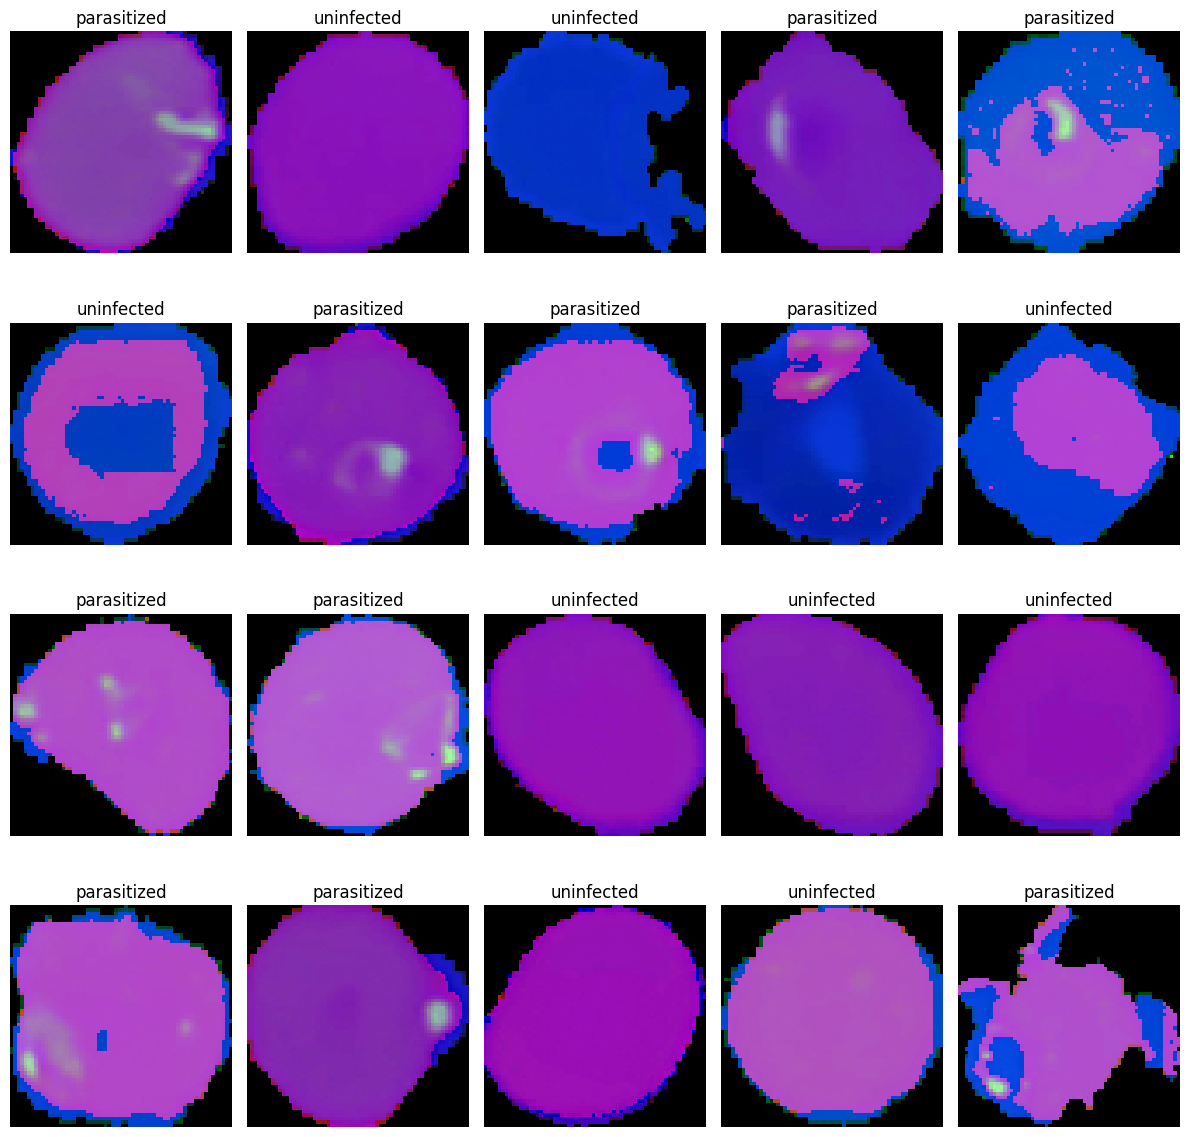

In [15]:
# Convert all images in X_train_normalized to HSV color space and store them in gfx
X_train_HSV = []  # to hold the HSV image array
for img in X_train_normalized:
    a = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_BGR2HSV)
    X_train_HSV.append(a)
X_train_HSV = np.array(X_train_HSV)

# Randomly select 20 indices to plot
viewimage = np.random.randint(0, len(X_train_normalized), 20)

# Determine the number of rows and columns
rows = 4
cols = 5

# Plot the selected samples
fig, ax = plt.subplots(rows, cols, figsize=(12, 12))

for t, i in enumerate(viewimage):
    label = 'parasitized' if y_train[i] == 0 else 'uninfected'
    row = t // cols
    col = t % cols
    ax[row, col].set_title(label)
    ax[row, col].imshow(X_train_HSV[i])
    ax[row, col].set_axis_off()

fig.tight_layout()
plt.show()

###<b> Converting the test data

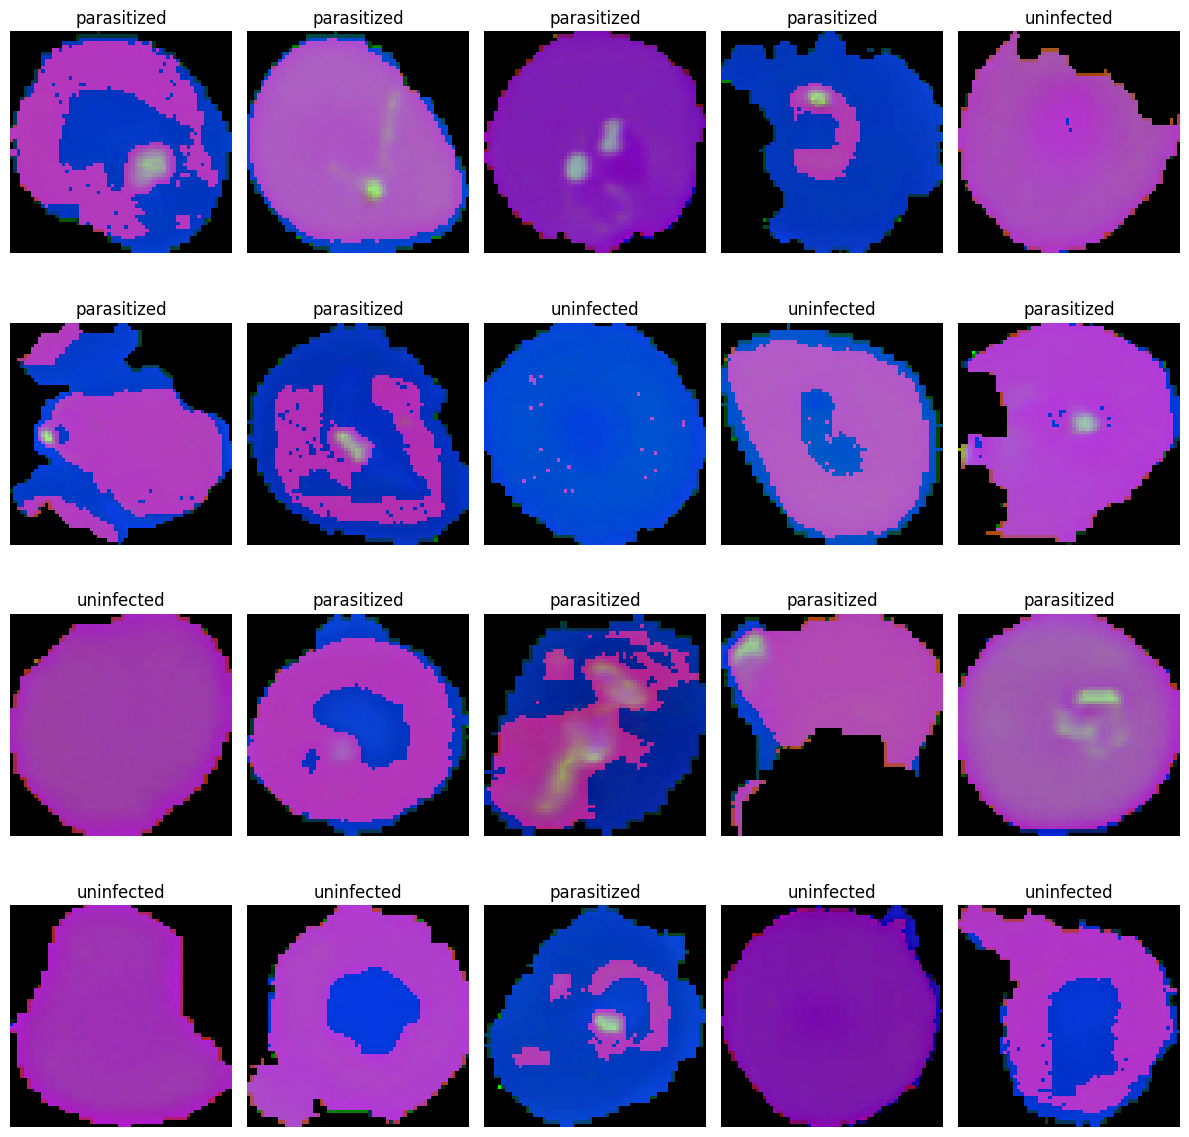

In [16]:
# Convert all images in X_train_normalized to HSV color space and store them in gfx
X_test_HSV = []  # to hold the HSV image array
for img in X_test_normalized:
    a = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_BGR2HSV)
    X_test_HSV.append(a)
X_test_HSV = np.array(X_test_HSV)

# Randomly select 20 indices to plot
viewimage = np.random.randint(0, len(X_test_normalized), 20)

# Determine the number of rows and columns
rows = 4
cols = 5

# Plot the selected samples
fig, ax = plt.subplots(rows, cols, figsize=(12, 12))

for t, i in enumerate(viewimage):
    label = 'parasitized' if y_test[i] == 0 else 'uninfected'
    row = t // cols
    col = t % cols
    ax[row, col].set_title(label)
    ax[row, col].imshow(X_test_HSV[i])
    ax[row, col].set_axis_off()

fig.tight_layout()
plt.show()

####<b>Observations and insights:

##### Converting RGB to HSV of Images provides a unique perspective on the presence of parasites within red blood cells, unveiling them as distinctively colored marks. **This transformation might  provide especially valuable in malaria detection.**

* HSV representation **remains relatively stable under different lighting conditions**, making it more robust to variations in illumination and shadows compared to RGB. **This stability enhances the reliability of color-based analysis tasks**, such as object detection or segmentation.

* HSV separates color information into distinct components (Hue, Saturation, Value), simplifying color-based analysis tasks. This separation allows for **easier manipulation and interpretation of color data**, facilitating tasks like color thresholding or segmentation.

* HSV aligns more closely with how humans perceive colors, as it separates hue (the perceived color), saturation (the intensity of the color), and value (the brightness of the color). This characteristic makes **HSV representation advantageous in designing computer vision algorithms that mimic human vision more accurately**.

* While converting RGB to HSV offers several advantages in terms of robustness, simplicity, and human perceptibility, it also comes with **limitations such as compatibility issues, increased computational complexity, and the potential for information loss**. Careful consideration of these factors is necessary when deciding whether to utilize HSV representation in image processing workflows.



###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

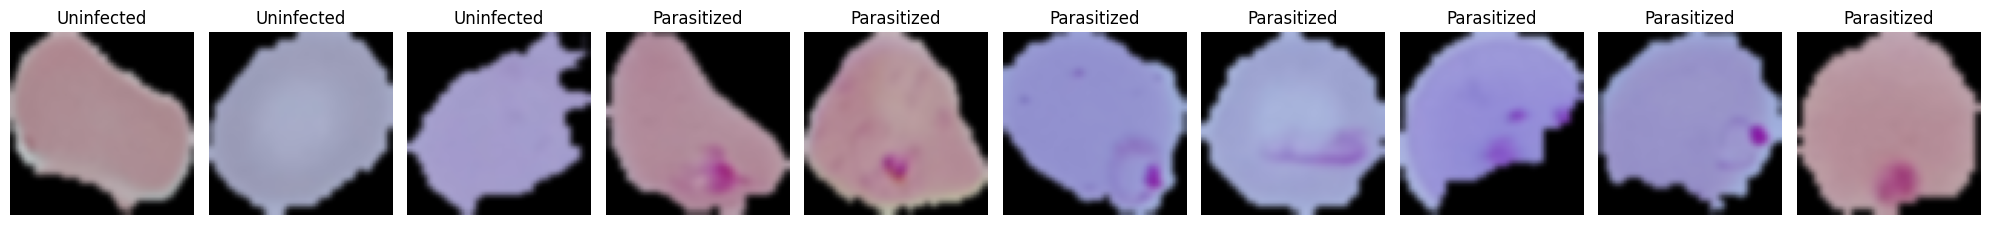

In [ ]:
# Set seed for reproducibility
#np.random.seed(42)

# To hold the blurred images
X_train_blur = []

# Generate blurred images
for i in range(100):
    b = cv2.GaussianBlur(X_train_normalized[i], (5, 5), 0)
    X_train_blur.append(b)

X_train_blur = np.array(X_train_blur)

# Select random samples
view_indices = np.random.randint(0, 100, 10)

# Plot the selected images
fig, ax = plt.subplots(1, 10, figsize=(20, 10))

for i, idx in enumerate(view_indices):
    title = "Parasitized" if y_train[idx] == 0 else "Uninfected"
    ax[i].set_title(title)
    ax[i].imshow(X_train_blur[idx])
    ax[i].set_axis_off()

fig.tight_layout()
plt.show()

###<b> Gaussian Blurring on test data

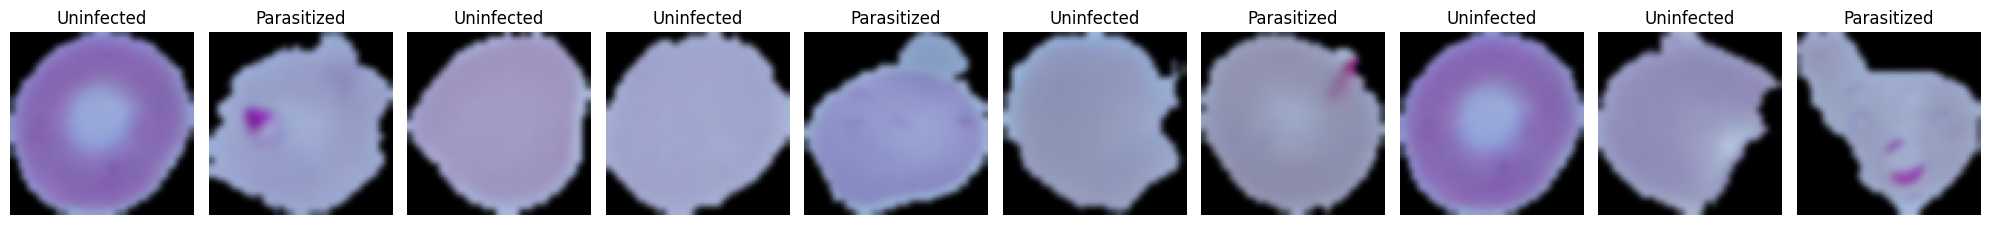

In [ ]:
# Set seed for reproducibility
#np.random.seed(42)

# To hold the blurred images
X_test_blur = []

# Generate blurred images
for i in range(100):
    b = cv2.GaussianBlur(X_test_normalized[i], (5, 5), 0)
    X_test_blur.append(b)

X_test_blur = np.array(X_test_blur)

# Select random samples
view_indices = np.random.randint(0, 100, 10)

# Plot the selected images
fig, ax = plt.subplots(1, 10, figsize=(20, 10))

for i, idx in enumerate(view_indices):
    title = "Parasitized" if y_test[idx] == 0 else "Uninfected"
    ax[i].set_title(title)
    ax[i].imshow(X_test_blur[idx])
    ax[i].set_axis_off()

fig.tight_layout()
plt.show()

####**Observations and insights:**

##### Blurring seams to lead to a loss of sharpness and definition of the the parasite afftected regionin and  blurry , potentially making it more challenging to accurately delineate parasite afftected regionin. Less defined parasites regions, especially in images of varying quality and brightness, might potentially lead to the complete loss of detection parasitized cells.

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

*  **Gaussian blurring** could potential help with RBC malaria detection by **reducing noise** in images, making it easier to identify and analyze the main features or **smooth out irregularities** in the image, potentially making it easier to detect certain patterns or structures, **blurring can also bring some disadvantages**. However, lurring may lead to a **loss of fine details in the image**, which could be important for accurately identifying and characterizing infected cells. Depending on the blurring parameters and the specific characteristics of the image, **blurring may introduce artefacts or distortions** that could impact the accuracy of the analysis. Also, **blurring may inadvertently mask or obscure important features of the infected cells**, making it more challenging for the model to accurately distinguish between infected and uninfected cells.
However, hile blurring may have some benefits, it may not be the most effective approach for addressing the problem. Instead, other preprocessing techniques may be more suitable. For example, **augmentation techniques such as rotation, flipping, or color-based transformations like HSV conversion might be more beneficial for malaria detection**. These techniques focus on preserving the essential features of infected cells, such as their shape, and color characteristics, which are crucial for accurate classification. Additionally, data augmentation methods that introduce variations in scale, rotation, and translation can enhance the robustness of the model and improve its generalization performance.




### **Lets explore some data augmentation tecniques**

## Rotation Augmentation

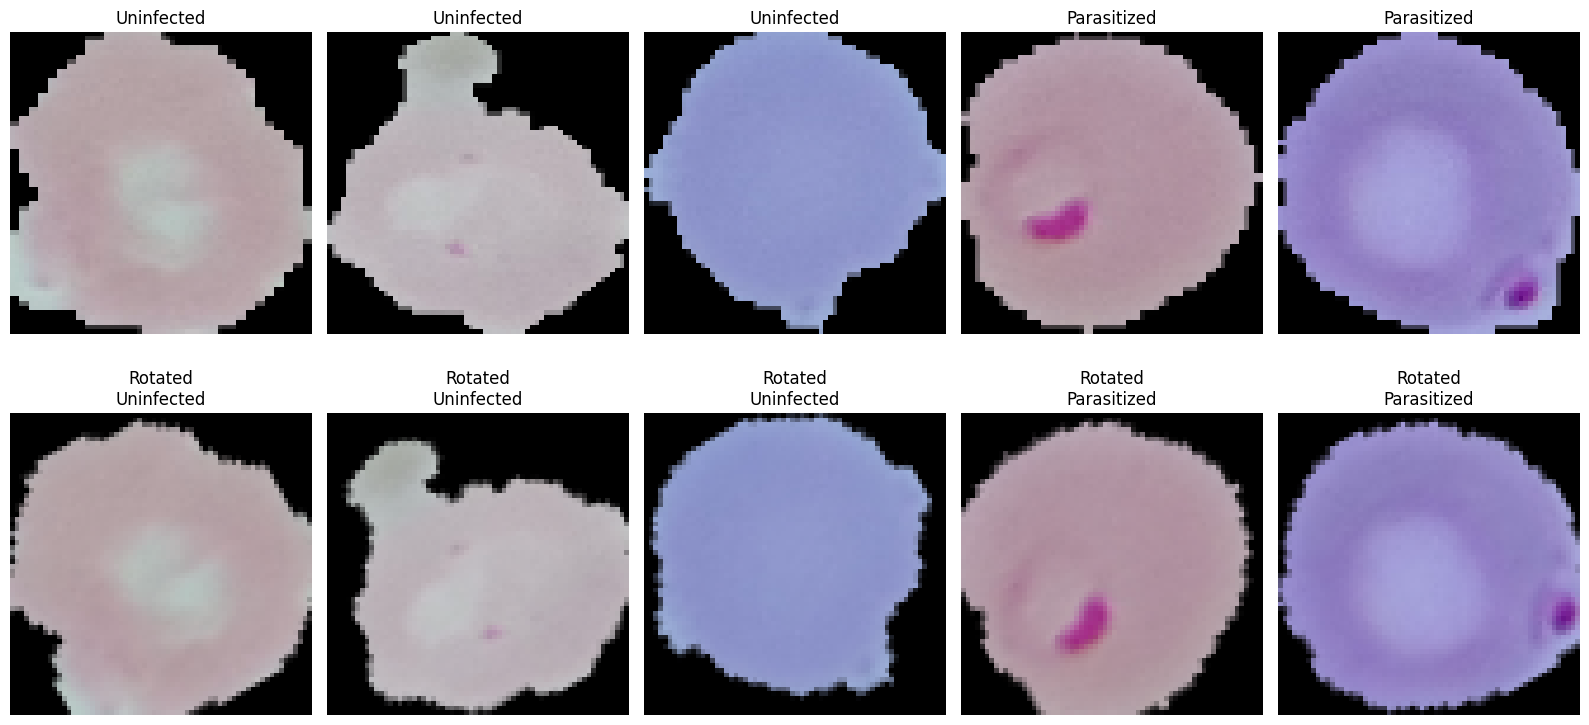

In [ ]:
# Set seed for reproducibility
#np.random.seed(42)

# Function to perform rotation augmentation
def rotate_image(image, angle):
    # Get image center coordinates
    center = (image.shape[1] / 2, image.shape[0] / 2)
    # Perform rotation
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
    return rotated_image

# To hold the augmented images
X_train_rotated = []

# Define rotation angle
rotation_angle = 30

# Generate augmented images
for i in range(100):
    rotated_image = rotate_image(X_train_normalized[i], rotation_angle)
    X_train_rotated.append(rotated_image)

X_train_rotated = np.array(X_train_rotated)

# Plot the selected images
fig, ax = plt.subplots(2, 5, figsize=(16, 8))

for i in range(5):
    title = "Parasitized" if y_train[i] == 0 else "Uninfected"
    ax[0, i].set_title(title)
    ax[0, i].imshow(X_train_normalized[i])
    ax[0, i].axis('off')

    rotated_image = rotate_image(X_train_normalized[i], rotation_angle)
    ax[1, i].set_title(f"Rotated\n{title}")
    ax[1, i].imshow(rotated_image)
    ax[1, i].axis('off')

fig.tight_layout()
plt.show()

### Flipping augmentation

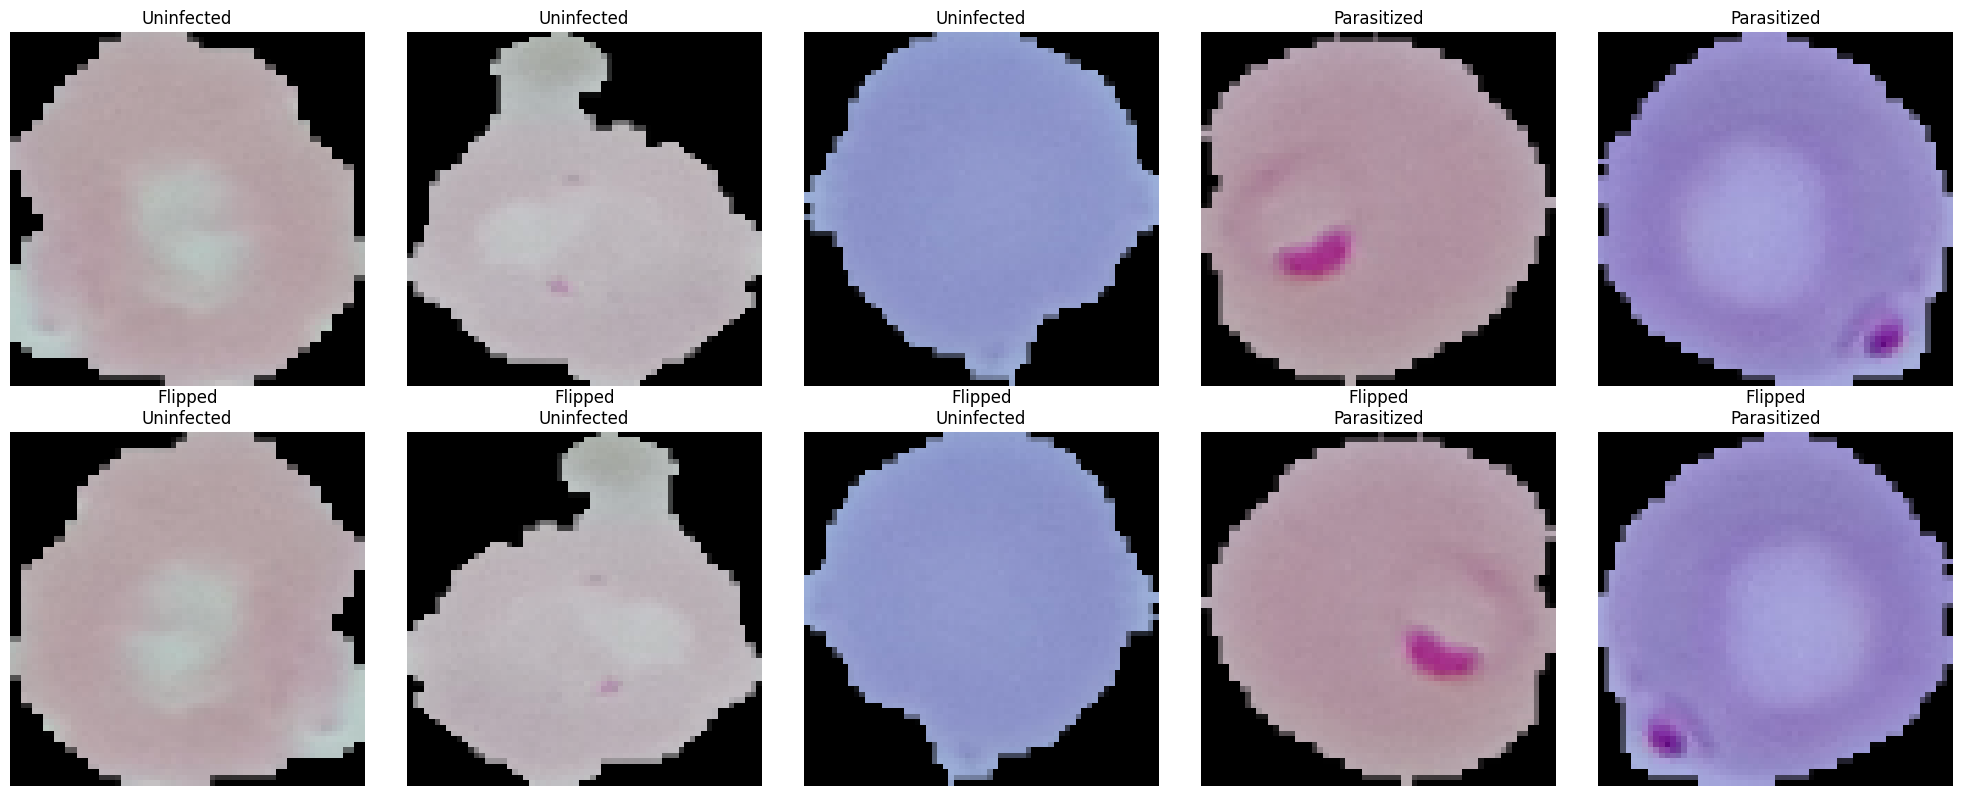

In [ ]:


# Function to perform flipping augmentation
def flip_image(image, flip_direction):
    # Flip the image horizontally or vertically
    flipped_image = np.flip(image, axis=flip_direction)
    return flipped_image

# To hold the augmented images
X_train_flipped = []

# Define flip direction for augmentation
flip_direction = 1  # 0 for horizontal flip, 1 for vertical flip

# Generate augmented images (flipping only)
for i in range(100):
    # Apply flipping augmentation
    flipped_image = flip_image(X_train_normalized[i], flip_direction)
    X_train_flipped.append(flipped_image)

X_train_flipped = np.array(X_train_flipped)

# Plot the selected images
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    title = "Parasitized" if y_train[i] == 0 else "Uninfected"
    ax[0, i].set_title(title)
    ax[0, i].imshow(X_train_normalized[i])
    ax[0, i].axis('off')

    ax[1, i].set_title(f"Flipped\n{title}")
    ax[1, i].imshow(X_train_flipped[i])
    ax[1, i].axis('off')

fig.tight_layout()
plt.show()

#####  **NOTE:** Rotation and flipping augmentations introduce variations in the orientation and spatial arrangement of cells, ensuring that the model learns to recognize infected cells regardless of their orientation.

## Zoom augmentation

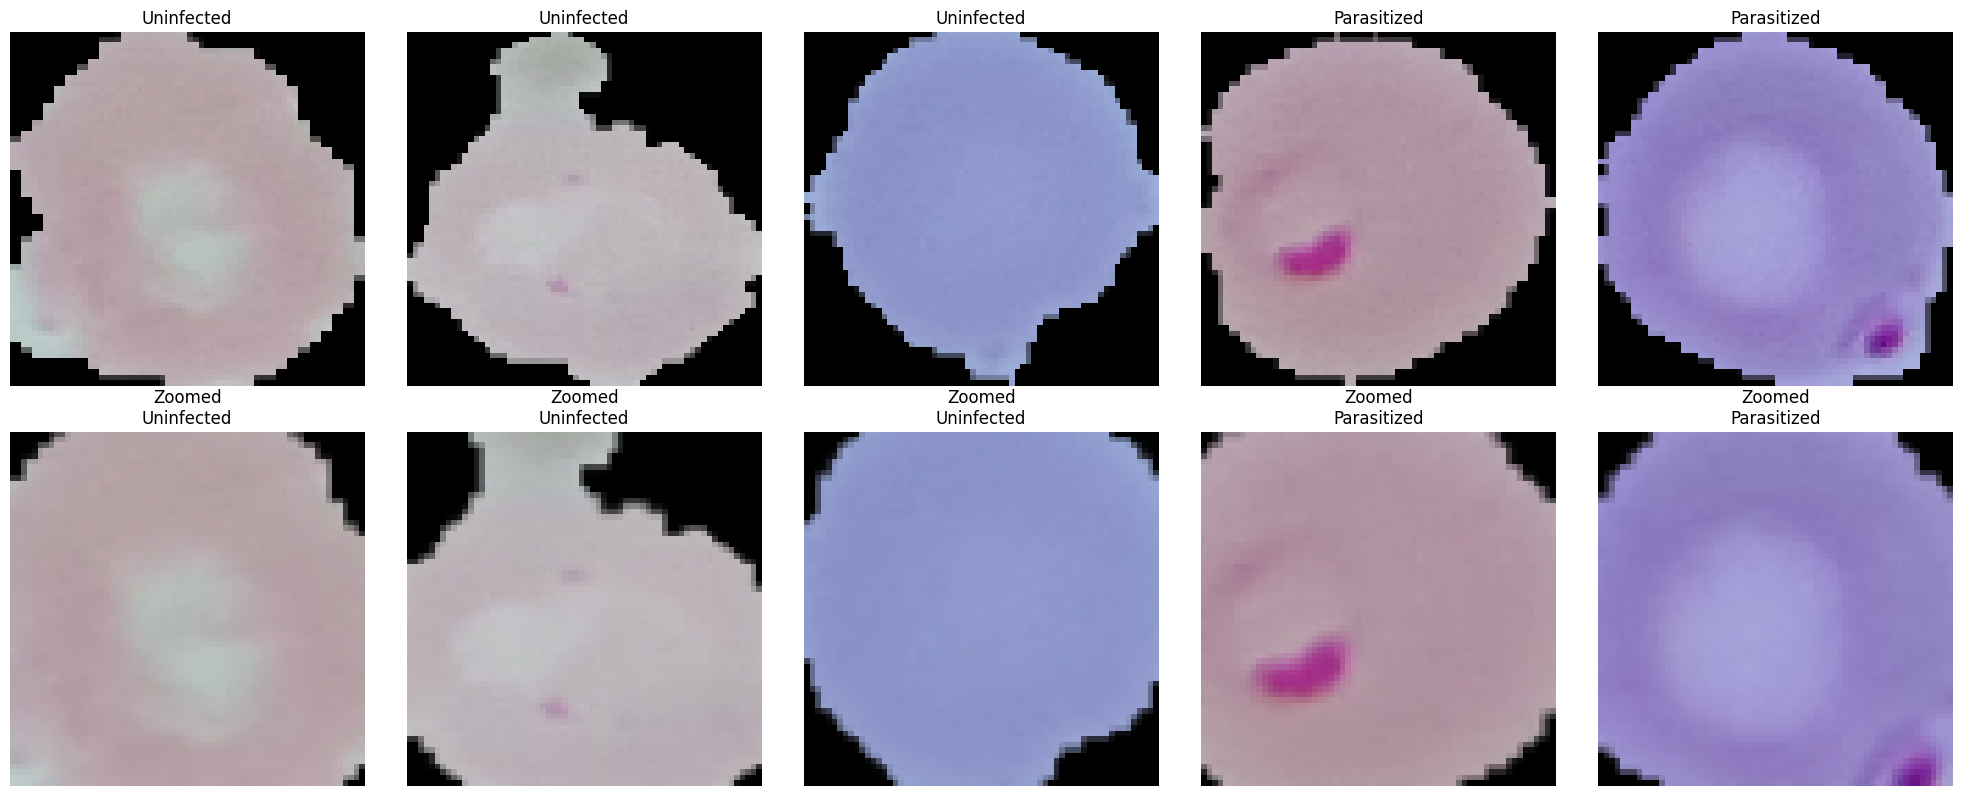

In [ ]:


# Set seed for reproducibility
np.random.seed(42)

# Function to perform zoom augmentation
def zoom_image(image, zoom_factor):
    # Get image dimensions
    height, width = image.shape[:2]

    # Calculate zoom region dimensions
    zoom_region_height = int(height * zoom_factor)
    zoom_region_width = int(width * zoom_factor)

    # Calculate top-left corner coordinates for zoom region
    top = int((height - zoom_region_height) / 2)
    left = int((width - zoom_region_width) / 2)

    # Calculate bottom-right corner coordinates for zoom region
    bottom = top + zoom_region_height
    right = left + zoom_region_width

    # Crop and resize zoom region
    zoomed_region = cv2.resize(image[top:bottom, left:right], (width, height))

    return zoomed_region

# To hold the augmented images
X_train_zoomed = []

# Define zoom factor ( 0.80 for zooming in by 20%)
zoom_factor = 0.80

# Generate augmented images (zoom only)
for i in range(100):
    zoomed_image = zoom_image(X_train_normalized[i], zoom_factor)
    X_train_zoomed.append(zoomed_image)

X_train_zoomed = np.array(X_train_zoomed)

# Plot the selected images
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    title = "Parasitized" if y_train[i] == 0 else "Uninfected"
    ax[0, i].set_title(title)
    ax[0, i].imshow(X_train_normalized[i])
    ax[0, i].axis('off')

    zoomed_image = zoom_image(X_train_normalized[i], zoom_factor)
    ax[1, i].set_title(f"Zoomed\n{title}")
    ax[1, i].imshow(zoomed_image)
    ax[1, i].axis('off')

fig.tight_layout()
plt.show()

##### **Notes:** Overall, while zoom augmentation can provide valuable variations in image scale and perspectives, it's essential to carefully consider its potential disadvantages and apply it judiciously to ensure that the augmented images maintain their quality and preserve the essential features relevant to malaria detection.

### **Contrast augmentation**


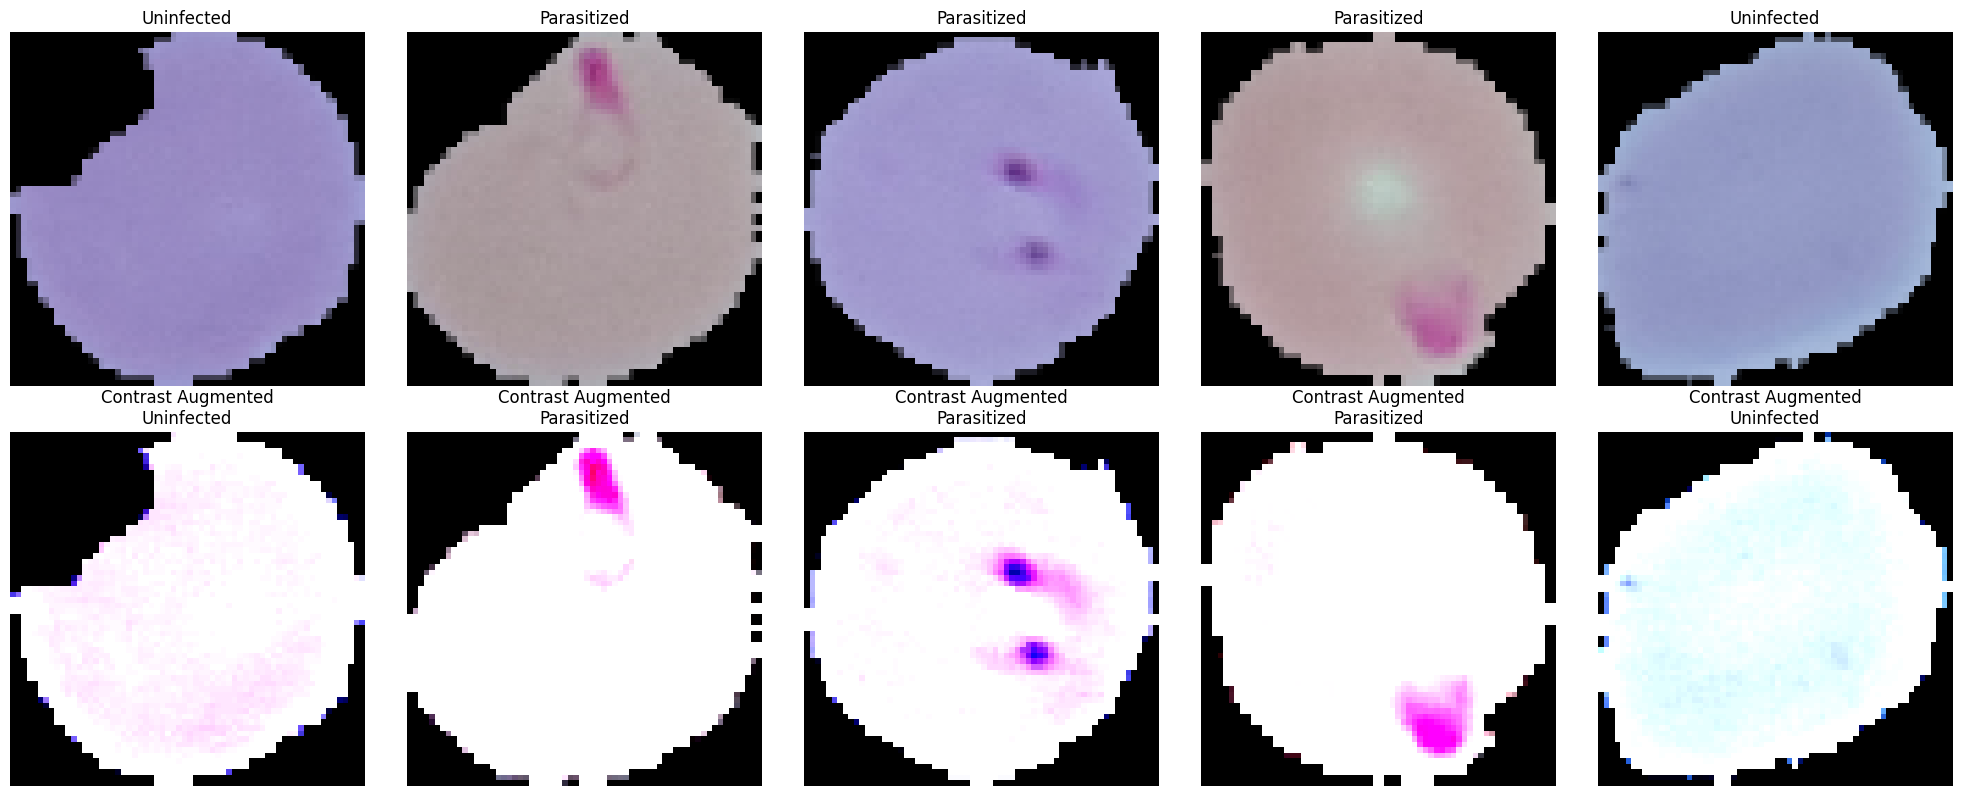

In [ ]:


# Function to adjust contrast
def adjust_contrast(image, contrast_factor):
    # Compute the mean pixel value
    mean_value = np.mean(image)
    # Adjust the contrast by scaling pixel values around the mean
    adjusted_image = (image - mean_value) * contrast_factor + mean_value
    # Clip pixel values to ensure they are in the [0, 1] range
    adjusted_image = np.clip(adjusted_image, 0, 1)
    return adjusted_image

# To hold the augmented images
X_train_contrast = []

# Define contrast factor for augmentation
contrast_factor = 5  # Adjust the contrast factor as needed (e.g., 1.5 for increased contrast, 0.5 for decreased contrast)

# Generate augmented images (contrast only)
for i in range(100):
    # Apply contrast augmentation
    contrast_adjusted_image = adjust_contrast(X_train_normalized[i], contrast_factor)
    X_train_contrast.append(contrast_adjusted_image)

X_train_contrast = np.array(X_train_contrast)

# Plot the selected images
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    title = "Parasitized" if y_train[i] == 0 else "Uninfected"
    ax[0, i].set_title(title)
    ax[0, i].imshow(X_train_normalized[i])
    ax[0, i].axis('off')

    ax[1, i].set_title(f"Contrast Augmented\n{title}")
    ax[1, i].imshow(X_train_contrast[i])
    ax[1, i].axis('off')

fig.tight_layout()
plt.show()

#####  **Note:** By enhancing the contrast in images, we can improve the visibility of subtle details, making it easier to discern important features related to infected cells, such as the presence of parasites within red blood cells.However, it's essential to use it judiciously to avoid potential pitfalls and ensure that the augmentation process enhances rather than detracts from the quality of the data.

###** Brightness augmentation**

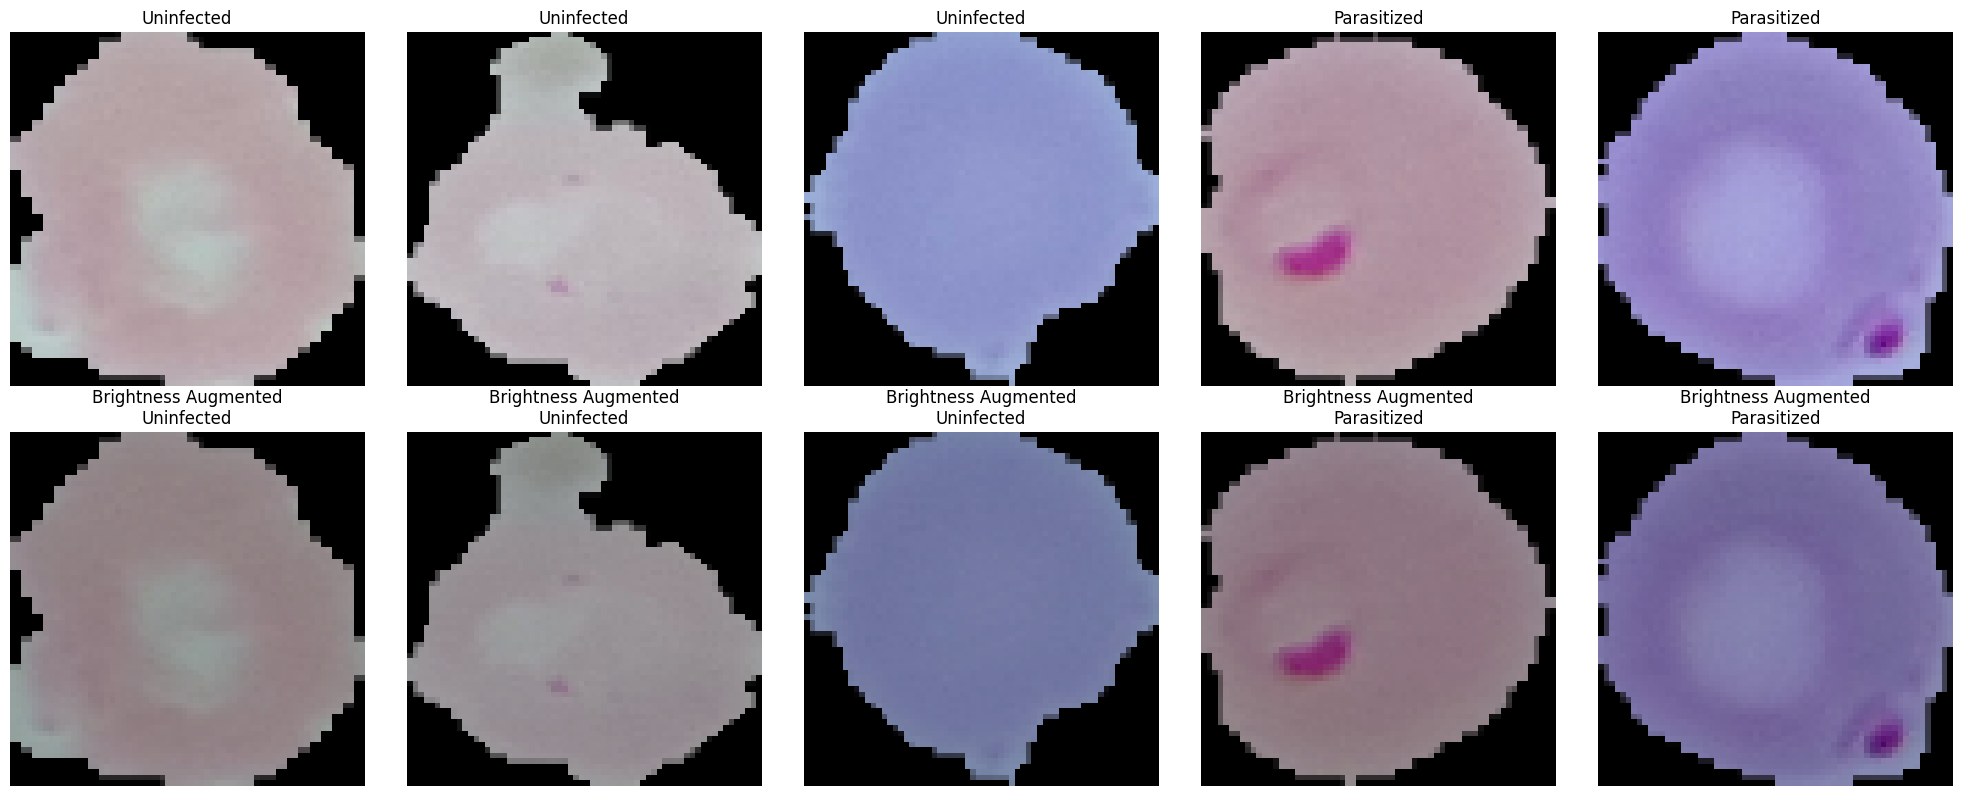

In [ ]:
# Function to perform brightness augmentation
def adjust_brightness(image, brightness_factor):
    # Clip to ensure pixel values are in [0, 1] range
    adjusted_image = np.clip(image * brightness_factor, 0, 1)
    return adjusted_image

# To hold the augmented images
X_train_brightness = []

# Define brightness factor ( 0.8 for 80% brightness)
brightness_factor = 0.8

# Generate augmented images (brightness only)
for i in range(100):
    # Apply brightness augmentation
    brightness_adjusted_image = adjust_brightness(X_train_normalized[i], brightness_factor)
    X_train_brightness.append(brightness_adjusted_image)

X_train_brightness = np.array(X_train_brightness)

# Plot the selected images
fig, ax = plt.subplots(2, 5, figsize=(20, 8))

for i in range(5):
    title = "Parasitized" if y_train[i] == 0 else "Uninfected"
    ax[0, i].set_title(title)
    ax[0, i].imshow(X_train_normalized[i])
    ax[0, i].axis('off')

    ax[1, i].set_title(f"Brightness Augmented\n{title}")
    ax[1, i].imshow(X_train_brightness[i])
    ax[1, i].axis('off')

fig.tight_layout()
plt.show()

**#####  Note:** Brightness augmentation, similar to contrast, might indirectly contribute to malaria detection by enhancing the visibility of important features in images.While the characteristic features of infected cells are primarily determined by color and shape, adequate brightness enhancement can improve the overall quality of the images, making it easier to discern subtle details and patterns associated with infected cells.

#####  **Note:** By enhancing the contrast in images, we can improve the visibility of subtle details, making it easier to discern important features related to infected cells, such as the presence of parasites within red blood cells.However, it's essential to use it judiciously to avoid potential pitfalls and ensure that the augmentation process enhances rather than detracts from the quality of the data.

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical


####<B>One Hot Encoding the train and test labels

In [ ]:
# Encoding Train Labels
y_train_onehot = to_categorical(y_train,num_classes=2)

# Similarly let us try to encode test labels
y_test_onehot = to_categorical(y_test,num_classes=2)



###<b> Building the model 0

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_0():
  #Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the malaria_detection_model function and store the model in a new variable
cnn_model_0= cnn_model_0()

# Print the summary of the model
cnn_model_0.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

# Using callbacks in TensorFlow/Keras allows you to perform certain actions during training, such as saving the model at checkpoints, stopping training early if it’s not improving, and reducing the learning rate on a plateau.

<b> Fit and train our Model

In [ ]:
# Fit the model on the training data
history_cnn_model_0 = cnn_model_0.fit(X_train_normalized, y_train_onehot, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 8ms/step - loss: 0.3728 - accuracy: 0.8125 - val_loss: 0.0848 - val_accuracy: 0.9702
Epoch 2/20
 12/624 [..............................] - ETA: 2s - loss: 0.0613 - accuracy: 0.9818

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 3s 6ms/step - loss: 0.0746 - accuracy: 0.9751 - val_loss: 0.0725 - val_accuracy: 0.9756
Epoch 3/20
624/624 [==============================] - 3s 6ms/step - loss: 0.0630 - accuracy: 0.9790 - val_loss: 0.0686 - val_accuracy: 0.9760
Epoch 4/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0551 - accuracy: 0.9802 - val_loss: 0.0595 - val_accuracy: 0.9788
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0512 - accuracy: 0.9819 - val_loss: 0.0630 - val_accuracy: 0.9786
Epoch 6/20
624/624 [==============================] - 3s 6ms/step - loss: 0.0431 - accuracy: 0.9839 - val_loss: 0.0647 - val_accuracy: 0.9786


###<b> Evaluating the model on test data

In [ ]:
# Accuracy
accuracy_cnn_model_0 = cnn_model_0.evaluate(X_test_normalized, y_test_onehot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_0[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0479 - accuracy: 0.9858

 Test_Accuracy:- 0.9857692122459412


In [ ]:
# Make predictions on the test set using model_0
y_test_pred_m0 = cnn_model_0.predict(X_test_normalized)

# Convert the predictions from one-hot encoded to label format
y_test_pred_m0 = np.argmax(y_test_pred_m0, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test_onehot, axis=1)


82/82 [==============================] - 0s 2ms/step


In [ ]:
## Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_pred_m0))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_test_pred_m0))


Confusion Matrix:
[[1287   13]
 [  24 1276]]


<b> Plotting the confusion matrix

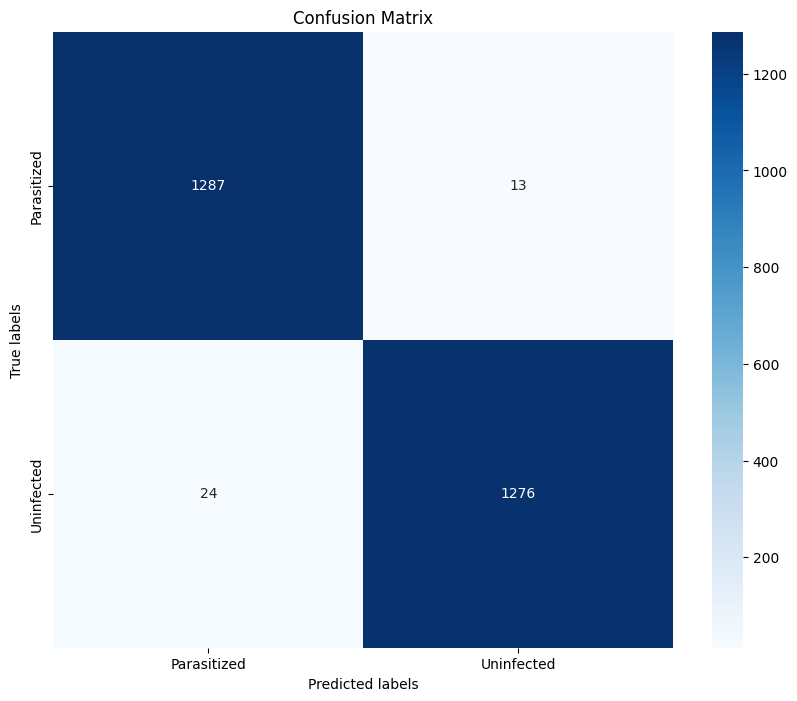

In [ ]:
lables = ["Parasitized", "Uninfected"]
# Print confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_pred_m0)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",xticklabels=lables, yticklabels=lables)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

**Observation:**

An accuracy of 0.9858 indicates that the model correctly diagnoses malaria in approximately 98.6%. **While the model's accuracy of 0.9858  might seem impressive the sheer scale of global malaria cases means that even a small error rate can lead to millions of incorrect diagnoses.** Therefore, accuracy alone can be misleading, especially in the context of medical diagnostics where the consequences of false negatives and false positives are critical.

- The presence of **13 false negatives** and **24 false positives** highlights the importance of looking beyond accuracy.

* False negatives occur when the model fails to identify malaria in a patient who actually has the disease. A false negative means that an infected individual might not receive the necessary treatment, leading to severe health complications or even death.

* False positives occur when the model incorrectly diagnoses a patient with malaria who does not have the disease. While less immediately dangerous than false negatives, false positives still have significant consequences, such as patients receiving  unnecessary antimalarial drugs, which can have side effects and contribute to the development of drug resistance. Also, in areas with limited healthcare resources, treating non-infected individuals can divert resources away from those who need them most.

* Other metrics like sensitivity (recall), specificity, precision, and the F1 score should also be considered to evaluate the model comprehensively. For instance:

* Sensitivity (Recall):  Measures the proportion of actual positives correctly identified. **High sensitivity is crucial to minimize false negatives.**

* Specificity: Measures the proportion of actual negatives correctly identified. **High specificity helps to reduce false positives.**


<b>Plotting the train and validation curves

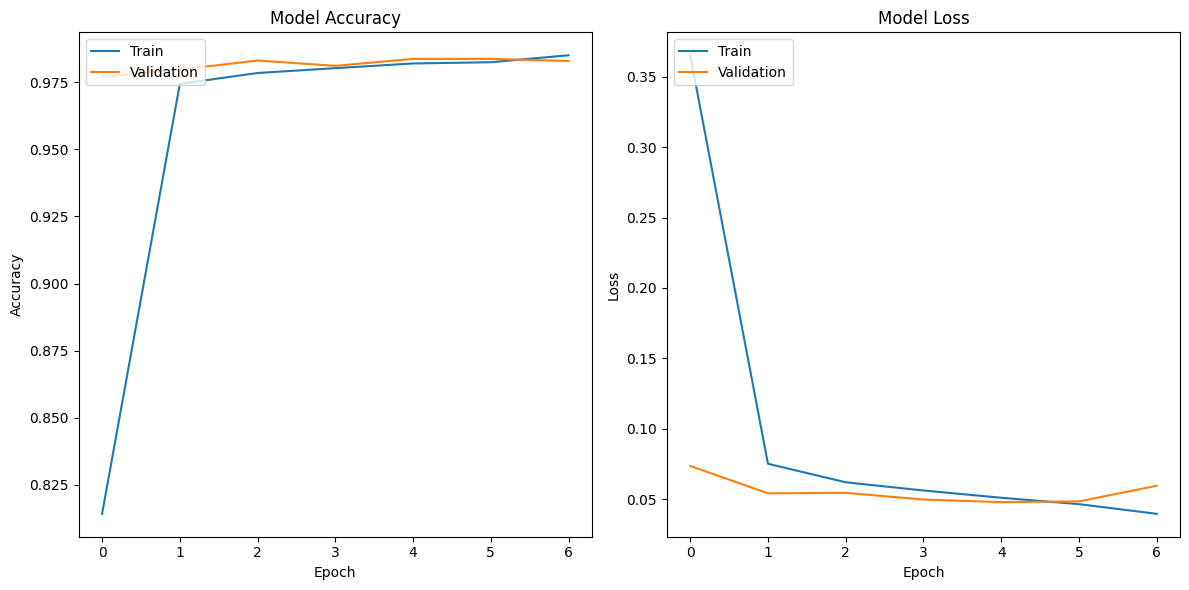

In [ ]:
# Plotting the train and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_cnn_model_0.history['accuracy'])
plt.plot(history_cnn_model_0.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn_model_0.history['loss'])
plt.plot(history_cnn_model_0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame from the history object
history_cnn_model_0_df = pd.DataFrame(history_cnn_model_0.history)

# Print the DataFrame
print(history_cnn_model_0_df)

       loss  accuracy  val_loss  val_accuracy
0  0.365205  0.814134  0.073639      0.977163
1  0.075197  0.974457  0.054194      0.979768
2  0.062046  0.978513  0.054549      0.983173
3  0.056227  0.980317  0.049800      0.981170
4  0.051071  0.982069  0.047969      0.983774
5  0.046519  0.982520  0.048498      0.983774
6  0.039677  0.985125  0.059569      0.982973


**Observations:**

The model demonstrates significant improvement in both training and validation metrics over the epochs.
The s**light increase in validation loss towards the last epoch suggests the beginning of overfitting.**

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

## **BASE Model_HVS_model**

In [ ]:
# Encoding Train Labels
y_train_onehot = to_categorical(y_train,num_classes=2)

# Similarly let us try to encode test labels
y_test_onehot = to_categorical(y_test,num_classes=2)

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_HSV():
  #Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the malaria_detection_model function and store the model in a new variable
cnn_model_HSV= cnn_model_HSV()

# Print the summary of the model
cnn_model_HSV.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]


In [ ]:
# Fit the model on the training data
history.cnn_model_HSV = cnn_model_HSV.fit(X_train_HSV, y_train_onehot, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - ETA: 0s - loss: 0.8498 - accuracy: 0.8366

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 133s 211ms/step - loss: 0.8498 - accuracy: 0.8366 - val_loss: 0.1087 - val_accuracy: 0.9708
Epoch 2/20
624/624 [==============================] - 134s 214ms/step - loss: 0.0869 - accuracy: 0.9749 - val_loss: 0.1048 - val_accuracy: 0.9744
Epoch 3/20
624/624 [==============================] - 114s 183ms/step - loss: 0.0723 - accuracy: 0.9778 - val_loss: 0.0853 - val_accuracy: 0.9780
Epoch 4/20
624/624 [==============================] - 102s 164ms/step - loss: 0.0649 - accuracy: 0.9799 - val_loss: 0.0947 - val_accuracy: 0.9738
Epoch 5/20
624/624 [==============================] - 99s 159ms/step - loss: 0.0553 - accuracy: 0.9825 - val_loss: 0.1011 - val_accuracy: 0.9748


In [ ]:
# Accuracy
accuracy_cnn_model_HSV = cnn_model_HSV.evaluate(X_test_HSV, y_test_onehot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_HSV[1])

82/82 [==============================] - 5s 67ms/step - loss: 0.0801 - accuracy: 0.9746

 Test_Accuracy:- 0.9746153950691223


In [ ]:
# Make predictions on the test set using model_0
y_test_cnn_model_HSV = cnn_model_HSV.predict(X_test_HSV)

# Convert the predictions from one-hot encoded to label format
y_test_cnn_model_HSV = np.argmax(y_test_cnn_model_HSV, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test_onehot, axis=1)


82/82 [==============================] - 7s 89ms/step


In [ ]:
## Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_cnn_model_HSV))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1300
           1       0.96      0.99      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



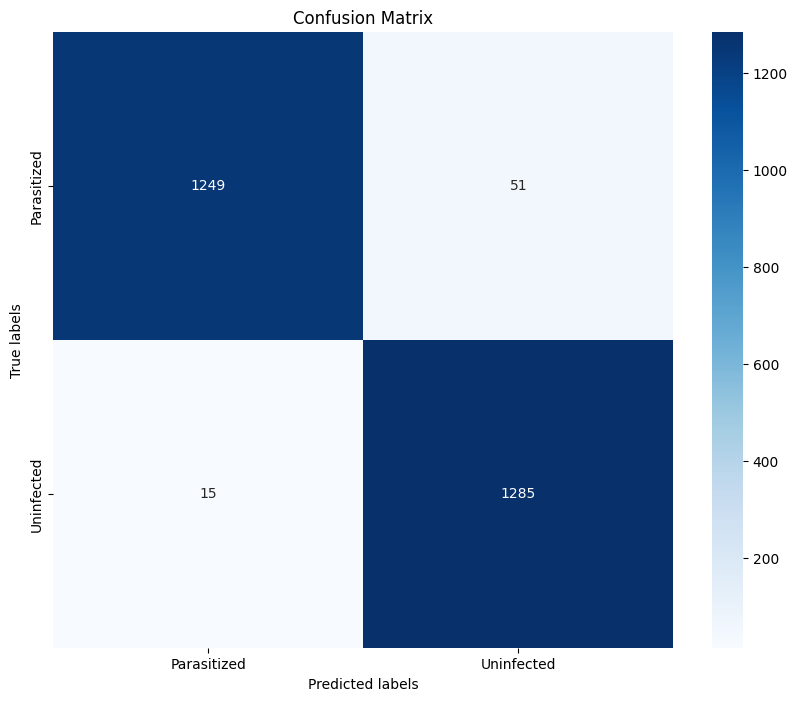

In [ ]:
lables = ["Parasitized", "Uninfected"]
# Print confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_cnn_model_HSV)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",xticklabels=lables, yticklabels=lables)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Plotting the train and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_cnn_model_0.history['accuracy'])
plt.plot(history_cnn_model_0.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn_model_0.history['loss'])
plt.plot(history_cnn_model_0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## **BASE MOdel HSV LeakyRelu as the activation function**

In [ ]:
# Encoding Train Labels
y_train_onehot = to_categorical(y_train,num_classes=2)

# Similarly let us try to encode test labels
y_test_onehot = to_categorical(y_test,num_classes=2)

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_HSV_1():
     # Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the cnn_model_1 function and store the model in a new variable
cnn_model_HSV_1 = cnn_model_HSV_1()

# Print the summary of the model
cnn_model_HSV_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model on the training data
history.cnn_model_HSV_1 = cnn_model_HSV_1.fit(X_train_HSV, y_train_onehot, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 118s 186ms/step - loss: 0.2770 - accuracy: 0.8985 - val_loss: 0.1728 - val_accuracy: 0.9455
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 108s 174ms/step - loss: 0.1051 - accuracy: 0.9649 - val_loss: 0.0816 - val_accuracy: 0.9744
Epoch 3/20
624/624 [==============================] - 107s 172ms/step - loss: 0.0743 - accuracy: 0.9757 - val_loss: 0.0799 - val_accuracy: 0.9790
Epoch 4/20
624/624 [==============================] - 112s 180ms/step - loss: 0.0671 - accuracy: 0.9772 - val_loss: 0.0739 - val_accuracy: 0.9784
Epoch 5/20
624/624 [==============================] - 107s 171ms/step - loss: 0.0619 - accuracy: 0.9792 - val_loss: 0.0809 - val_accuracy: 0.9746
Epoch 6/20
502/624 [=======================>......] - ETA: 20s - loss: 0.0541 - accuracy: 0.9824

In [ ]:
# Accuracy
accuracy_cnn_model_HSV_1 = cnn_model_HSV_1.evaluate(X_test_HSV, y_test_onehot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_HSV_1[1])

82/82 [==============================] - 6s 67ms/step - loss: 0.0874 - accuracy: 0.9785

 Test_Accuracy:- 0.9784615635871887


In [ ]:
# Make predictions on the test set using model_0
y_test_cnn_model_HSV_1 = cnn_model_HSV_1.predict(X_test_HSV)

# Convert the predictions from one-hot encoded to label format
y_test_cnn_model_HSV = np.argmax(y_test_cnn_model_HSV_1, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test_onehot, axis=1)


82/82 [==============================] - 8s 93ms/step


In [ ]:
## Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_cnn_model_HSV))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1300
           1       0.96      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



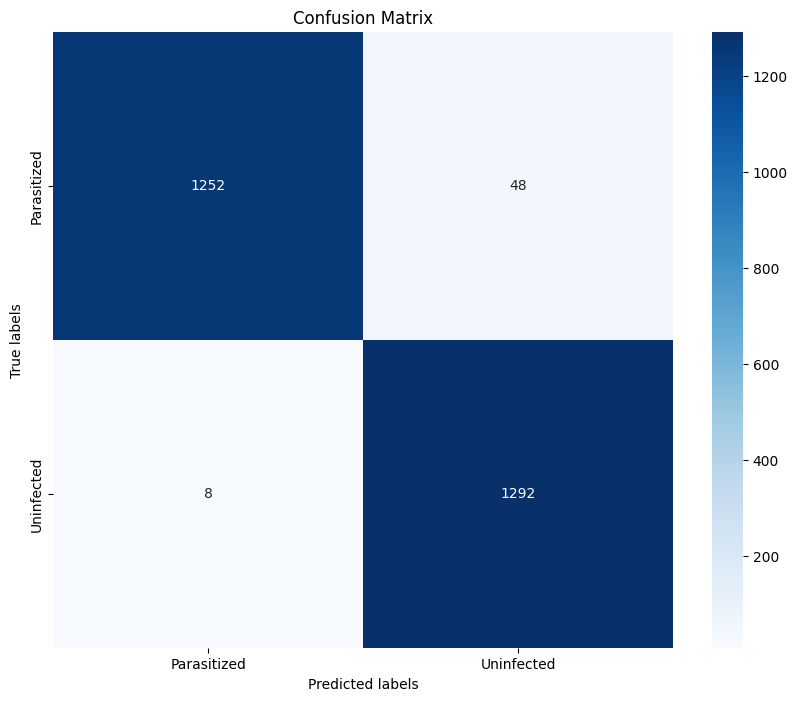

In [ ]:
lables = ["Parasitized", "Uninfected"]
# Print confusion matrix
conf_matrix = confusion_matrix(y_test_labels,y_test_cnn_model_HSV)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",xticklabels=lables, yticklabels=lables)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

## **Model 0.1 LeakyRelu as the activation function**

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_01():
     # Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(LeakyReLU(alpha=0.1))

    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(LeakyReLU(alpha=0.1))

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512))
    model.add(Dropout(0.4))
    model.add(LeakyReLU(alpha=0.1))

    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the cnn_model_1 function and store the model in a new variable
cnn_model_01 = cnn_model_01()

# Print the summary of the model
cnn_model_01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)        0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model on the training data
history_cnn_model_01 = cnn_model_01.fit(X_train_normalized, y_train_onehot, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 11s 8ms/step - loss: 0.2751 - accuracy: 0.8688 - val_loss: 0.0784 - val_accuracy: 0.9748
Epoch 2/20
 10/624 [..............................] - ETA: 3s - loss: 0.0393 - accuracy: 0.9969

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 4s 6ms/step - loss: 0.0700 - accuracy: 0.9764 - val_loss: 0.0733 - val_accuracy: 0.9744
Epoch 3/20
624/624 [==============================] - 3s 6ms/step - loss: 0.0602 - accuracy: 0.9793 - val_loss: 0.0669 - val_accuracy: 0.9770
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0562 - accuracy: 0.9809 - val_loss: 0.0642 - val_accuracy: 0.9764
Epoch 5/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0514 - accuracy: 0.9814 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 6/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0465 - accuracy: 0.9832 - val_loss: 0.0729 - val_accuracy: 0.9794


In [ ]:
# Make predictions on the test set using model_0
y_test_pred_m01 = cnn_model_01.predict(X_test_normalized)

# Convert the predictions from one-hot encoded to label format
y_test_pred_m01 = np.argmax(y_test_pred_m01, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test_onehot, axis=1)

82/82 [==============================] - 1s 5ms/step


In [ ]:
## Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_pred_m01))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.98      2600
   macro avg       0.99      0.98      0.98      2600
weighted avg       0.99      0.98      0.98      2600



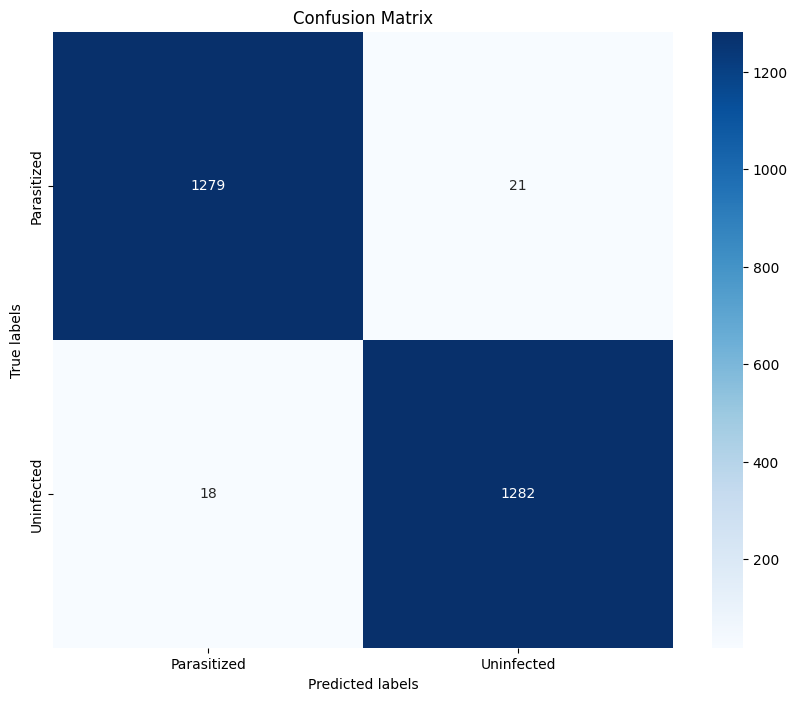

In [ ]:
lables = ["Parasitized", "Uninfected"]
# Print confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_pred_m01)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",xticklabels=lables, yticklabels=lables)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

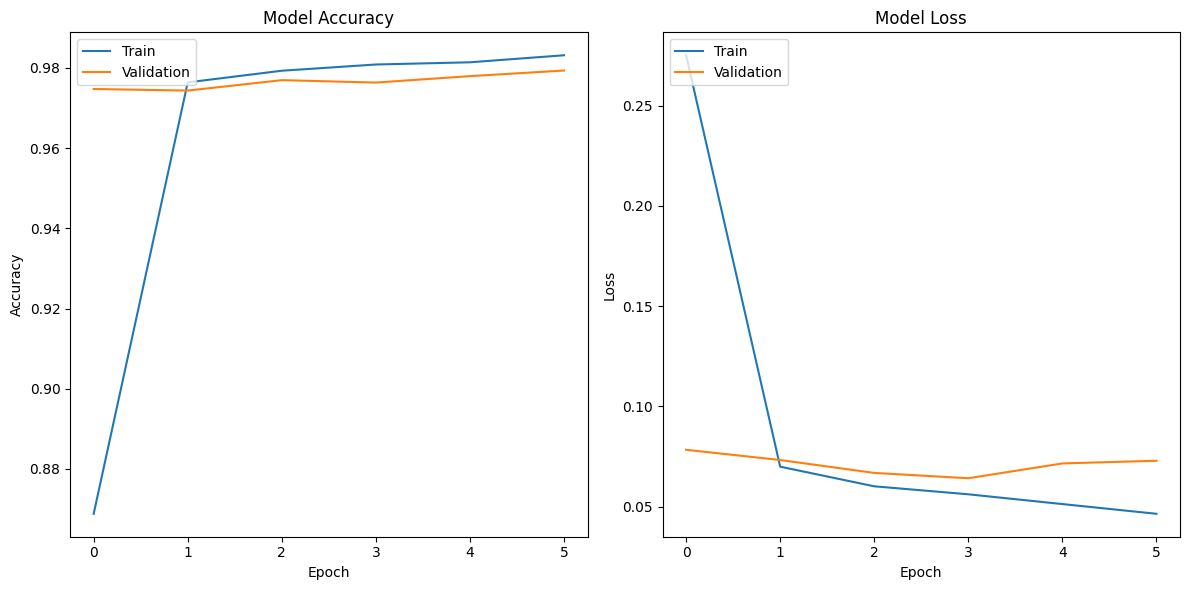

In [ ]:
# Plotting the train and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_cnn_model_01.history['accuracy'])
plt.plot(history_cnn_model_01.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn_model_01.history['loss'])
plt.plot(history_cnn_model_01.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame from the history object
history_cnn_model_01_df = pd.DataFrame(history_cnn_model_01.history)

# Print the DataFrame
print(history_cnn_model_01_df)

       loss  accuracy  val_loss  val_accuracy
0  0.275063  0.868827  0.078409      0.974760
1  0.069998  0.976410  0.073318      0.974359
2  0.060208  0.979315  0.066882      0.976963
3  0.056231  0.980867  0.064228      0.976362
4  0.051355  0.981418  0.071620      0.977965
5  0.046510  0.983171  0.072946      0.979367


Model 0.1 sigmoid as the activation function

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
# Set seed for reproducibility
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def cnn_model_02():
     # Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the cnn_model_1 function and store the model in a new variable
cnn_model_02 = cnn_model_02()

# Print the summary of the model
cnn_model_02.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)         

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Fit the model on the training data
history_cnn_model_02 = cnn_model_02.fit(X_train_normalized, y_train, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 8ms/step - loss: 0.3501 - accuracy: 0.8241 - val_loss: 0.0828 - val_accuracy: 0.9716
Epoch 2/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0744 - accuracy: 0.9748 - val_loss: 0.0735 - val_accuracy: 0.9746
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0604 - accuracy: 0.9793 - val_loss: 0.0731 - val_accuracy: 0.9742
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0572 - accuracy: 0.9802 - val_loss: 0.0678 - val_accuracy: 0.9748
Epoch 5/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0482 - accuracy: 0.9821 - val_loss: 0.0744 - val_accuracy: 0.9768
Epoch 6/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0431 - accuracy: 0.9846 - val_loss: 0.0620 - val_accuracy: 0.9782
Epoch 7/20
624/624 [==============================] - 6s 10ms/step - loss: 0.0417 - accuracy: 0.9855 - val_loss: 0.0631 - val_accuracy: 0.9792
Epoch

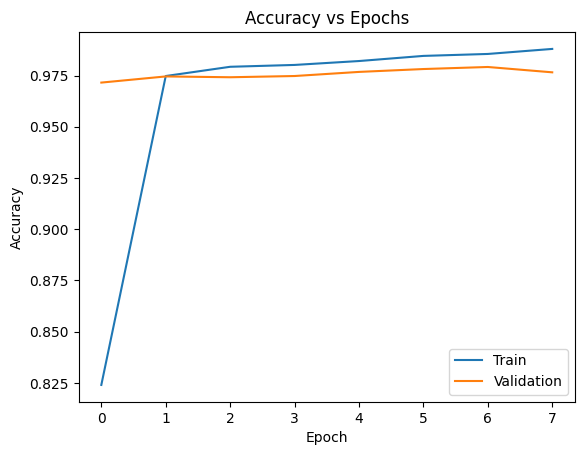

In [ ]:
plt.plot(history_cnn_model_02.history['accuracy'])
plt.plot(history_cnn_model_02.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Model evaluation on the test data

In [ ]:
model_3.evaluate(X_test_normalized, y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test_normalized))

In [ ]:
# Accuracy
accuracy_cnn_model_02 = cnn_model_02.evaluate(X_test_normalized, y_test, verbose = 1)
test_pred = np.round(cnn_model_02.predict(X_test_normalized))

print('\n', 'Test_Accuracy:-', accuracy_cnn_model_02[1])

82/82 [==============================] - 0s 4ms/step

 Test_Accuracy:- 0.986923098564148


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



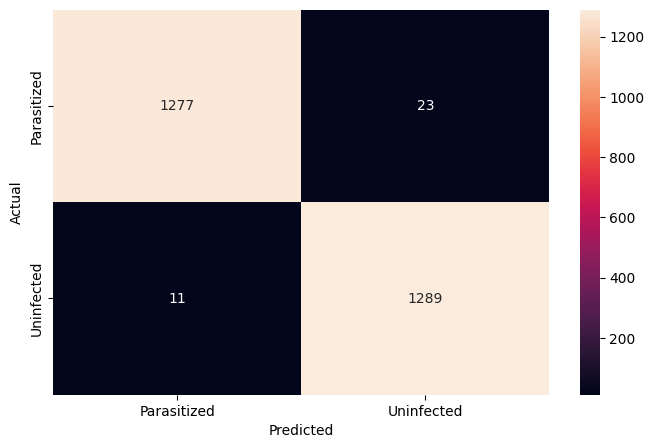

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f',xticklabels=lables, yticklabels=lables)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)


###<b> Building the Model

In [ ]:
def cnn_model_1():
  #Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Fourth Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.20))

    # Fifth Convolutional layer with 124 filters, kernel size 3x3, and same padding
    model.add(Conv2D(124, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the malaria_detection_model function and store the model in a new variable
cnn_model_1= cnn_model_1()

# Print the summary of the model
cnn_model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

# Using callbacks in TensorFlow/Keras allows you to perform certain actions during training, such as saving the model at checkpoints, stopping training early if it’s not improving, and reducing the learning rate on a plateau.

<b>Fit and Train the model

In [ ]:

# Fit the model on the training data
history_cnn_model_1 = cnn_model_1.fit(X_train_normalized, y_train_onehot, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 8s 9ms/step - loss: 0.4717 - accuracy: 0.7229 - val_loss: 0.0621 - val_accuracy: 0.9788
Epoch 2/20
  7/624 [..............................] - ETA: 5s - loss: 0.0634 - accuracy: 0.9777

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 5s 8ms/step - loss: 0.0712 - accuracy: 0.9768 - val_loss: 0.0540 - val_accuracy: 0.9818
Epoch 3/20
624/624 [==============================] - 5s 7ms/step - loss: 0.0636 - accuracy: 0.9795 - val_loss: 0.0523 - val_accuracy: 0.9812
Epoch 4/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0571 - accuracy: 0.9802 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 5/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0577 - accuracy: 0.9795 - val_loss: 0.0490 - val_accuracy: 0.9822
Epoch 6/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0551 - accuracy: 0.9805 - val_loss: 0.0447 - val_accuracy: 0.9858
Epoch 7/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0538 - accuracy: 0.9797 - val_loss: 0.0514 - val_accuracy: 0.9818
Epoch 8/20
624/624 [==============================] - 4s 7ms/step - loss: 0.0500 - accuracy: 0.9819 - val_loss: 0.0561 - val_accuracy: 0.9830


###<b> Evaluating the model on test data

In [ ]:
# Accuracy
accuracy_cnn_model_1 = cnn_model_1.evaluate(X_test_normalized, y_test_onehot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_1[1])

82/82 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9877

 Test_Accuracy:- 0.9876922965049744


In [ ]:
# Make predictions on the test set using model_1
y_test_pred_m1 = cnn_model_1.predict(X_test_normalized)

# Convert the predictions from one-hot encoded to label format
y_test_pred_m1 = np.argmax(y_test_pred_m1, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test_onehot, axis=1)



82/82 [==============================] - 0s 2ms/step


In [ ]:
## Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_pred_m1))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_test_pred_m1))


Confusion Matrix:
[[1279   21]
 [  11 1289]]


<b> Plotting the confusion matrix

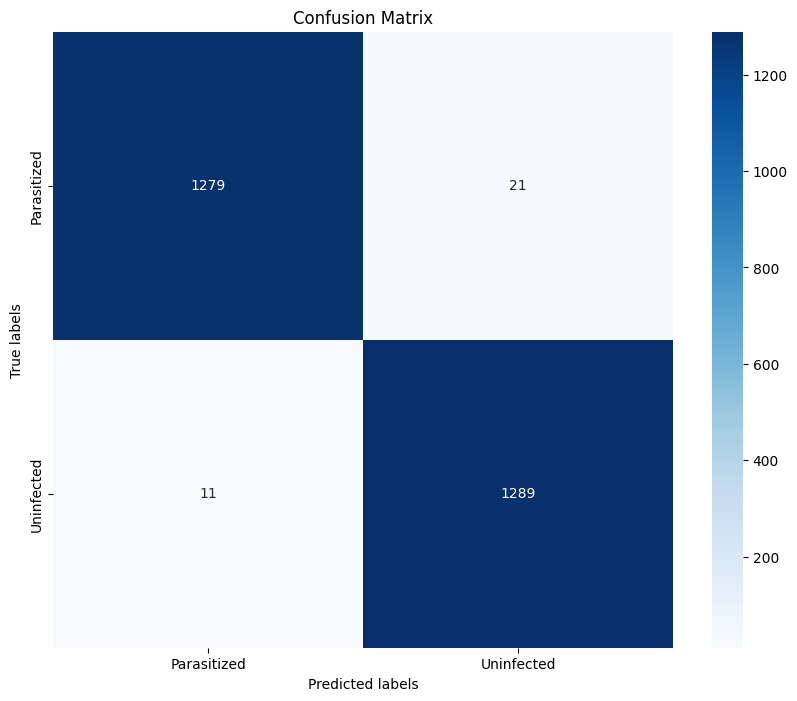

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_pred_m1)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",xticklabels=lables, yticklabels=lables)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

**Observations:**

The model_1 shows a slight improvement in accuracy and a reduction in total incorrect diagnoses when compared to model 0. However, the  new model demonstrates a trade-off between reducing false positives and increasing false negatives. While it performs better overall in terms of accuracy, the lower recall for parasitized cell is a significant concern. Optimizing the model further to improve recall for malaria without sacrificing too much on the non-malaria side would be important for achieving a balanced and effective diagnostic tool.

<b> Plotting the train and the validation curves

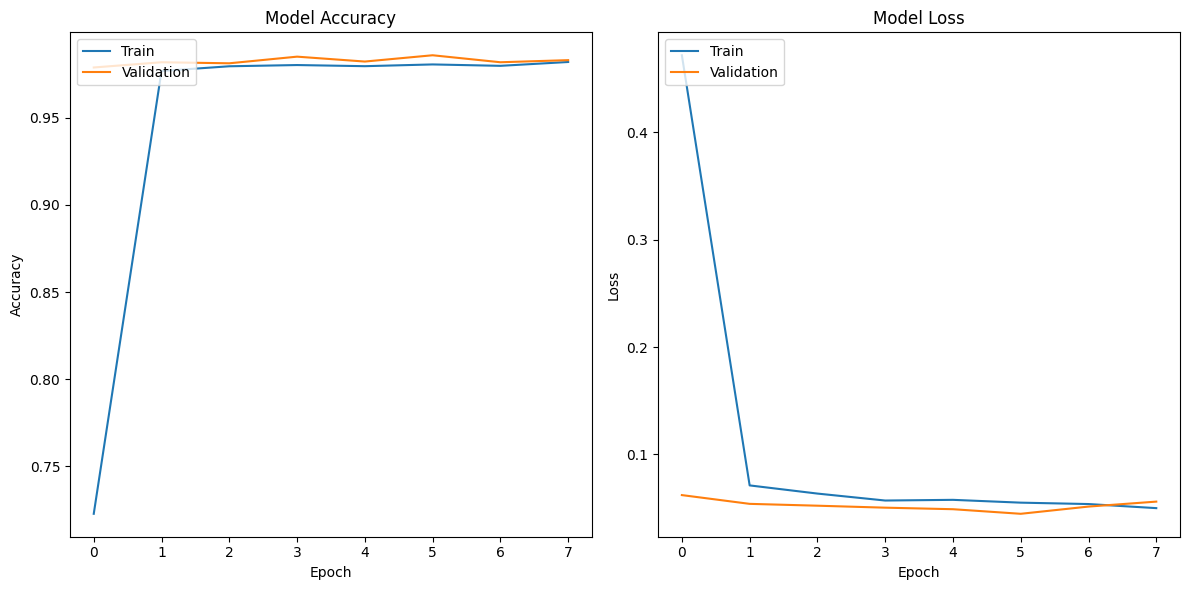

In [ ]:
# Plotting the train and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_cnn_model_1.history['accuracy'])
plt.plot(history_cnn_model_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn_model_1.history['loss'])
plt.plot(history_cnn_model_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Create a DataFrame from the history object
history_cnn_model_1_df = pd.DataFrame(history_cnn_model_1.history)

# Print the DataFrame
print(history_cnn_model_1_df)

       loss  accuracy  val_loss  val_accuracy
0  0.471727  0.722879  0.062137      0.978766
1  0.071158  0.976761  0.053978      0.981771
2  0.063553  0.979465  0.052263      0.981170
3  0.057075  0.980166  0.050427      0.984976
4  0.057718  0.979515  0.048990      0.982171
5  0.055097  0.980517  0.044723      0.985777
6  0.053800  0.979716  0.051447      0.981771
7  0.049991  0.981919  0.056066      0.982973


###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Note:

LeakyReLU is a variant of the ReLU activation function that allows a small, non-zero gradient when the unit is not active. This can help address the "dying ReLU" problem where neurons get stuck during training and stop learning. Benefits of LeakyReLU:

- Ensures that neurons continue to learn even when they are not active.
- Enhances training dynamics, leading to better performance, especially in deep networks where traditional ReLU might fail.

BatchNormalization normalizes the input of each layer to have zero mean and unit variance, offering several benefits:

- Reduces internal covariate shift, stabilizing and speeding up training.
- Adds a regularization effect, potentially reducing the need for other forms of regularization like dropout.

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
# Clear the previous model's history from the Keras backend.
keras.backend.clear_session()

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Building the Model

In [ ]:
# Define the model with LeakyReLU and BatchNormalization
def cnn_model_2():
    # Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Third Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.4))

    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the malaria_detection_model function and store the model in a new variable
cnn_model_2 = cnn_model_2()

# Print the summary of the model
cnn_model_2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 16)        64        
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        1

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
# Fit the model on the training data
history_cnn_model_2 = cnn_model_2.fit(X_train_normalized, y_train_onehot, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 9s 10ms/step - loss: 0.2680 - accuracy: 0.8931 - val_loss: 0.1457 - val_accuracy: 0.9507
Epoch 2/20
 19/624 [..............................] - ETA: 3s - loss: 0.0988 - accuracy: 0.9671

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 4s 7ms/step - loss: 0.1006 - accuracy: 0.9660 - val_loss: 0.0606 - val_accuracy: 0.9772
Epoch 3/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0874 - accuracy: 0.9721 - val_loss: 0.0956 - val_accuracy: 0.9694
Epoch 4/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0799 - accuracy: 0.9748 - val_loss: 0.0612 - val_accuracy: 0.9800


###<b> Evaluating the model on test data

In [ ]:
# Accuracy
accuracy_cnn_model_2 = cnn_model_2.evaluate(X_test_normalized, y_test_onehot, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_2[1])

82/82 [==============================] - 1s 7ms/step - loss: 0.0607 - accuracy: 0.9812

 Test_Accuracy:- 0.9811538457870483


In [ ]:
# Make predictions on the test set using model_0
y_test_pred_m2 = cnn_model_2.predict(X_test_normalized)

# Convert the predictions from one-hot encoded to label format
y_test_pred_m2 = np.argmax(y_test_pred_m2, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test_onehot, axis=1)


82/82 [==============================] - 1s 8ms/step


<b> Generate the classification report and confusion matrix

In [ ]:
## Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_pred_m2))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_test_pred_m2))

Confusion Matrix:
[[1266   34]
 [  15 1285]]


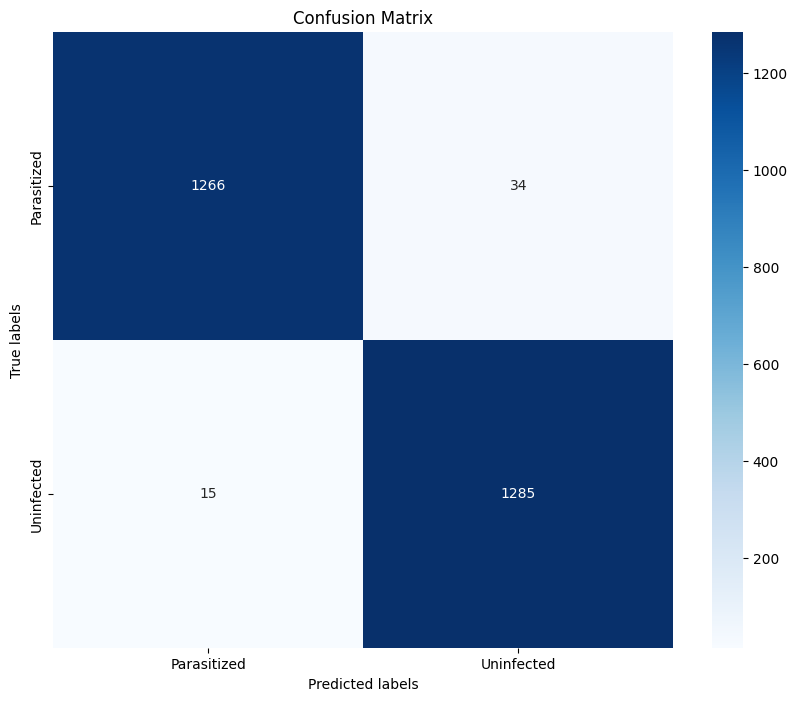

In [ ]:

lables = ["Parasitized", "Uninfected"]
# Print confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_test_pred_m2)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",xticklabels=lables, yticklabels=lables)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

**Observations: **
 - Model 2 presented lower overall accuracy( 0.9812) and a  lower recal.

<b>Plotting the train and validation accuracy

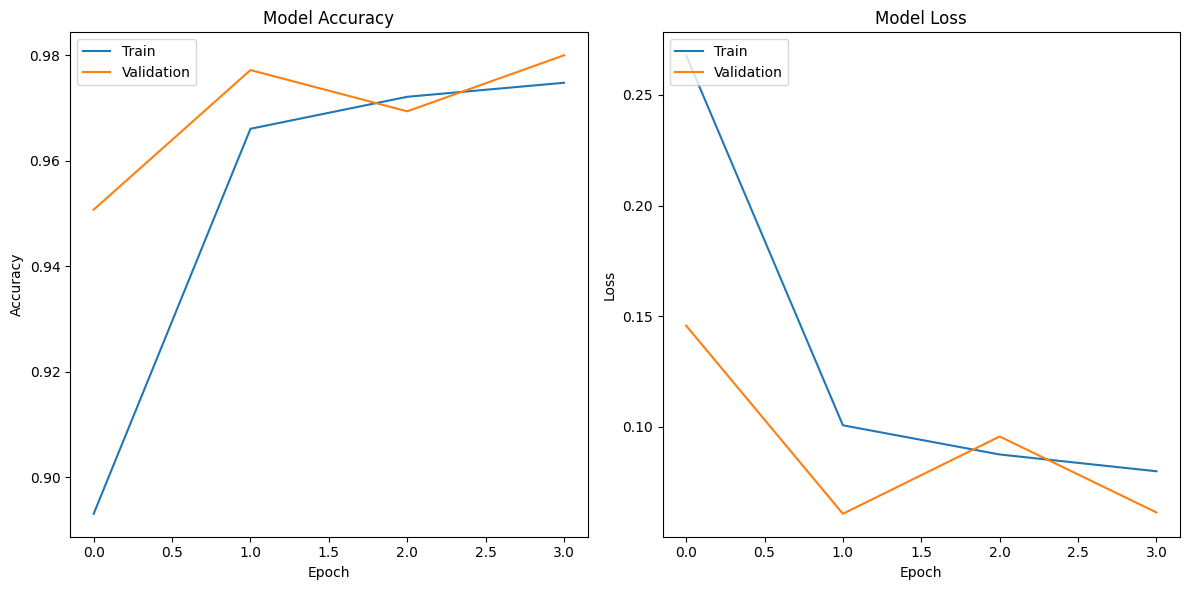

In [ ]:
# Plotting the train and validation curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_cnn_model_2.history['accuracy'])
plt.plot(history_cnn_model_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn_model_2.history['loss'])
plt.plot(history_cnn_model_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame from the history object
history_cnn_model_2_df = pd.DataFrame(history_cnn_model_2.history)

# Print the DataFrame
print(history_cnn_model_2_df)

       loss  accuracy  val_loss  val_accuracy
0  0.267953  0.893118  0.145721      0.950721
1  0.100641  0.966042  0.060627      0.977163
2  0.087447  0.972103  0.095584      0.969351
3  0.079860  0.974757  0.061240      0.979968


####<b>Observations and insights:
Fluctuations in metrics during training indicate instability and hinder the model's ability to learn effectively. There are some possible reasons for such behavior:

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?

Incorporating image data augmentation into  model training pipeline can lead to improved performance, reduced overfitting, and increased robustness of deep learning models, particularly in tasks like image classification

* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Use image data generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

TRAIN_DATADIR = "/content/cell_images/train"
# Define the directory where the test data is stored
TEST_DATADIR = "/content/cell_images/test"
CATEGORIES = ["parasitized", "uninfected"]
IMG_SIZE = 64
BATCH_SIZE = 32

# Creating ImageDataGenerator with rotation, horizontal flipping, and contrast augmentation
datagen = ImageDataGenerator(
    rescale=1./255,               # Rescale pixel values to [0, 1]
    rotation_range=40,            # Rotate images randomly by up to 40 degrees
    horizontal_flip=True,         # Flip images horizontally
    brightness_range=[0.5, 1.5],  # Adjust brightness randomly between 0.5 and 1.5
    validation_split=0.2          # Fraction of images to use for validation (20%)
)

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to [0, 1]
)

# Creating data generator for training data
train_generator = datagen.flow_from_directory(
    TRAIN_DATADIR,
    target_size=(IMG_SIZE, IMG_SIZE),    # Resize images to 64x64
    batch_size=BATCH_SIZE,                # Number of images in each batch
    class_mode='binary',                  # Binary classification (infected or uninfected)
    subset='training',                    # Use training subset of data
    shuffle=True,                         # Shuffle the training data
    seed=42                               # Seed for reproducibility
)

# Creating data generator for validation data
validation_generator = datagen.flow_from_directory(
    TRAIN_DATADIR,
    target_size=(IMG_SIZE, IMG_SIZE),    # Resize images to 64x64
    batch_size=BATCH_SIZE,                # Number of images in each batch
    class_mode='binary',                  # Binary classification (infected or uninfected)
    subset='validation',                  # Use validation subset of data
    shuffle=False                         # Do not shuffle the validation data
)
# Create data generator for test data
test_generator = test_datagen.flow_from_directory(
    TEST_DATADIR,
    target_size=(IMG_SIZE, IMG_SIZE),    # Resize images to 64x64
    batch_size=BATCH_SIZE,                # Number of images in each batch
    class_mode='binary',                  # Binary classification (infected or uninfected)
    shuffle=False                         # Do not shuffle the test data
)

Found 19967 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Original Images

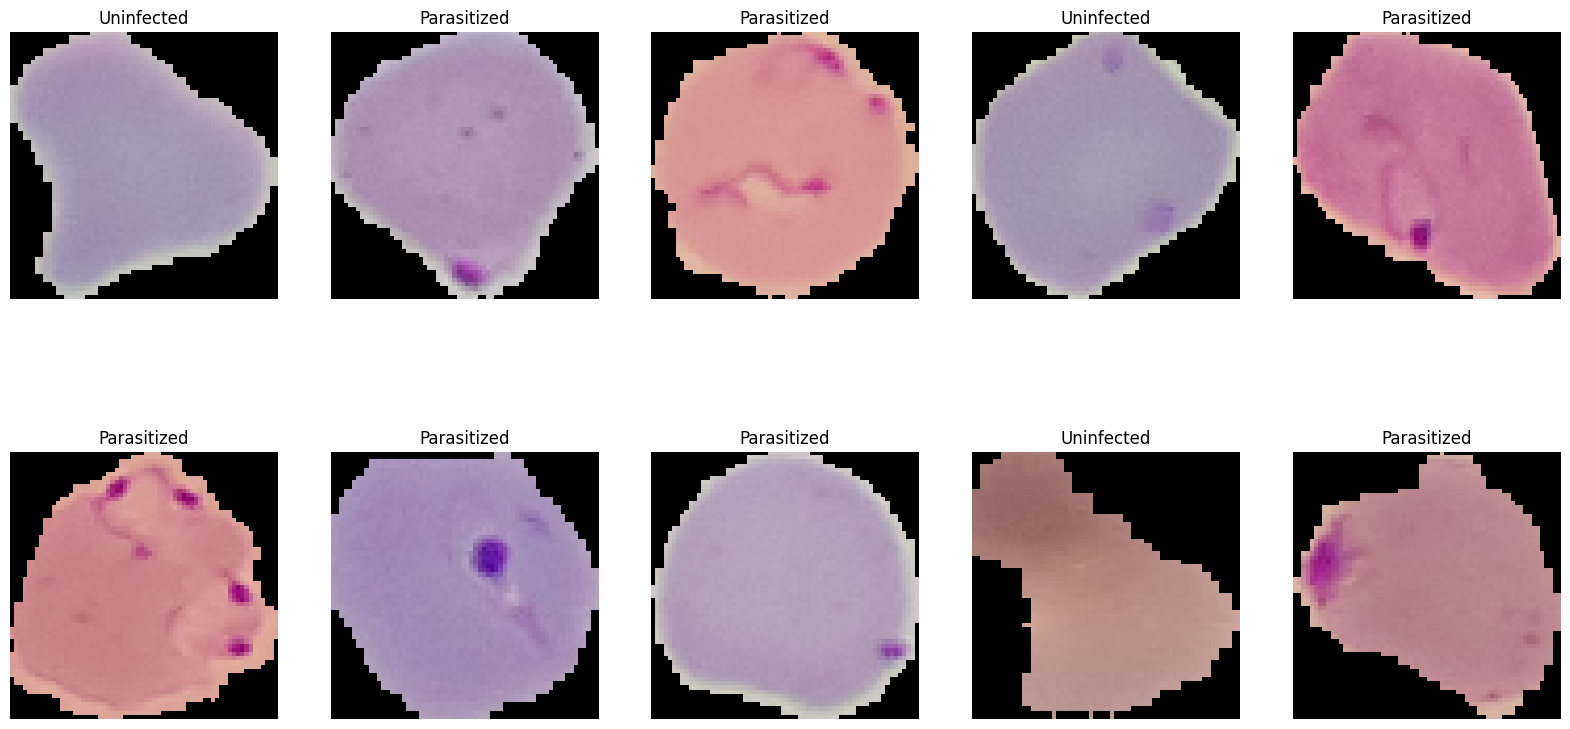

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Function to get class label based on directory name
def get_label_from_dir(directory):
    if "parasitized" in directory:
        return "Parasitized"
    elif "uninfected" in directory:
        return "Uninfected"
    else:
        return "Unknown"

# Initialize variables
original_images_dir = os.path.join(TRAIN_DATADIR)
original_images_paths = []

# Get paths to original images
for category in CATEGORIES:
    category_dir = os.path.join(original_images_dir, category)
    original_images_paths += [os.path.join(category_dir, img_name) for img_name in os.listdir(category_dir)]

# Select and display 10 random original images
plt.figure(figsize=(20, 10))
for i in range(10):
    # Select a random original image
    random_image_path = random.choice(original_images_paths)
    # Load and display the original image
    original_img = image.load_img(random_image_path, target_size=(IMG_SIZE, IMG_SIZE))
    plt.subplot(2, 5, i+1)
    plt.imshow(original_img)
    plt.title(get_label_from_dir(os.path.dirname(random_image_path)))
    plt.axis('off')

plt.show()

####<B>Visualizing Augmented images

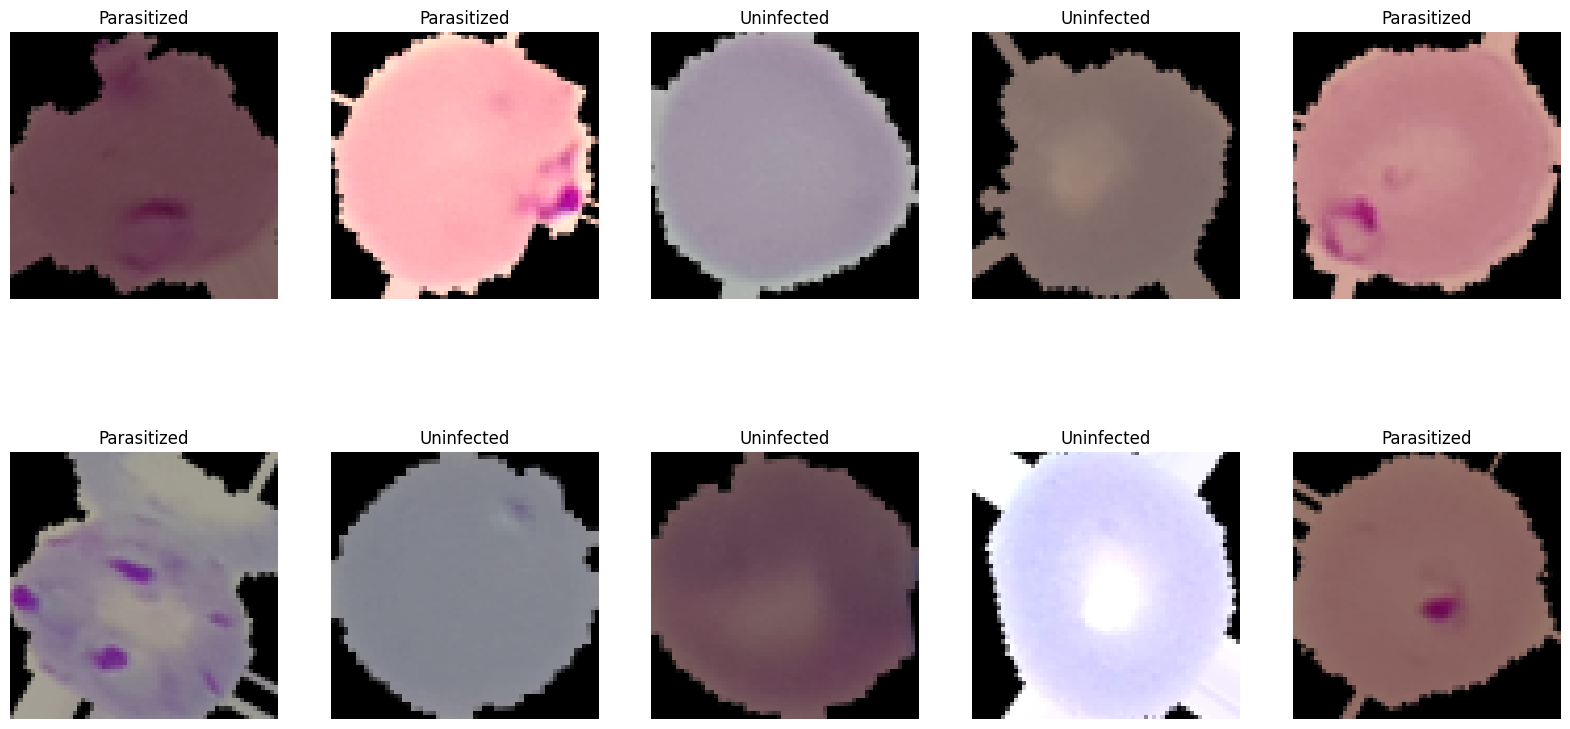

In [ ]:
# Visualize 10 randomly selected augmented images with labels
plt.figure(figsize=(20, 10))
for i in range(10):
    # Get a random index within the range of the generator's length
    random_index = random.randint(0, len(train_generator) - 1)
    # Get a batch of augmented images and labels from the training generator at the random index
    batch = train_generator[random_index]
    augmented_images = batch[0]  # Augmented images in the batch
    labels = batch[1]            # Labels corresponding to the images
    # Randomly select an image from the batch
    random_image_index = random.randint(0, len(augmented_images) - 1)
    augmented_img = augmented_images[random_image_index]  # Randomly selected augmented image
    label = labels[random_image_index]                     # Label corresponding to the image
    plt.subplot(2, 5, i+1)
    plt.imshow(augmented_img)
    plt.title('Parasitized' if label == 0 else 'Uninfected')
    plt.axis('off')

plt.show()

###<b>Building the Model

In [ ]:
def cnn_model_3():
    #Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer with nodes equal to the number of classes (2) and 'softmax' activation
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model



# Call the cnn_model_3 function and store the model in a new variable
cnn_model_3 = cnn_model_3()

# Print the summary of the model
cnn_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
# Train the model using fit with callbacks
history = cnn_model_3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks
)

Epoch 1/10
623/623 [==============================] - 169s 270ms/step - loss: 0.3920 - accuracy: 0.8024 - val_loss: 0.1367 - val_accuracy: 0.9690


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
623/623 [==============================] - 165s 266ms/step - loss: 0.0983 - accuracy: 0.9681 - val_loss: 0.1096 - val_accuracy: 0.9635
Epoch 3/10
623/623 [==============================] - 164s 264ms/step - loss: 0.0773 - accuracy: 0.9753 - val_loss: 0.0759 - val_accuracy: 0.9736
Epoch 4/10
623/623 [==============================] - 165s 265ms/step - loss: 0.0707 - accuracy: 0.9757 - val_loss: 0.0709 - val_accuracy: 0.9776
Epoch 5/10
623/623 [==============================] - 163s 262ms/step - loss: 0.0642 - accuracy: 0.9788 - val_loss: 0.0655 - val_accuracy: 0.9778
Epoch 6/10
623/623 [==============================] - 165s 265ms/step - loss: 0.0625 - accuracy: 0.9776 - val_loss: 0.0658 - val_accuracy: 0.9756
Epoch 7/10
623/623 [==============================] - 189s 303ms/step - loss: 0.0620 - accuracy: 0.9790 - val_loss: 0.0578 - val_accuracy: 0.9784
Epoch 8/10
623/623 [==============================] - 163s 261ms/step - loss: 0.0589 - accuracy: 0.9786 - val_loss: 0.0756 -

<b>Plot the train and validation accuracy

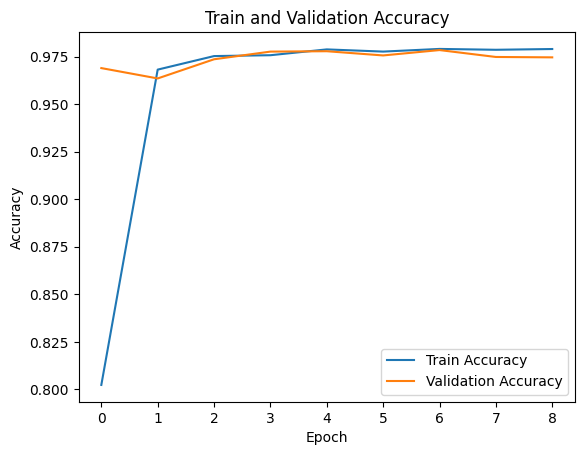

In [ ]:
# Plot the train and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()


###<B>Evaluating the model

In [ ]:
# Accuracy
accuracy_cnn_model_3 = cnn_model_3.evaluate(test_generator, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_3[1])

82/82 [==============================] - 5s 64ms/step - loss: 0.0366 - accuracy: 0.9869

 Test_Accuracy:- 0.986923098564148


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 8s 90ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1300
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



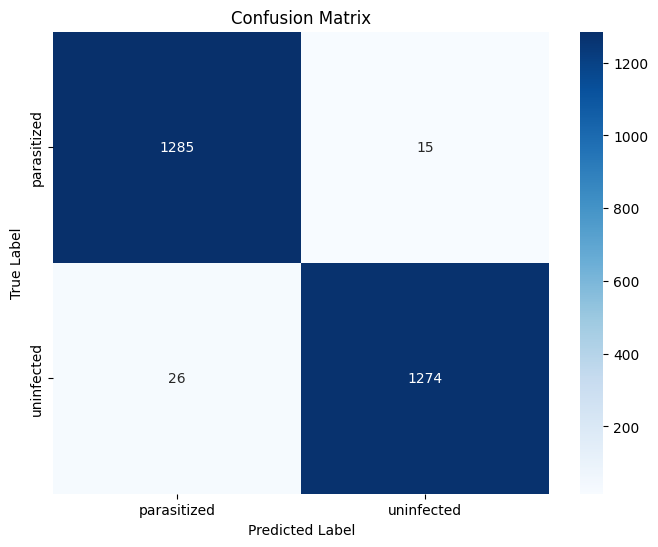

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the test data
test_pred = cnn_model_3.predict(test_generator)

# Convert probabilities to class labels
test_pred_labels = (test_pred > 0.7).astype(int)

# Get true labels
true_labels = test_generator.classes

# Plot classification report
print("Classification Report:")
print(classification_report(true_labels, test_pred_labels))

# Plot confusion matrix
cm = confusion_matrix(true_labels, test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Generate classification report
report = classification_report(true_labels, test_pred_labels, target_names=CATEGORIES, output_dict=True)

# Convert report to tabular format
table = []
for key, value in report.items():
    if key in CATEGORIES:
        table.append([key, value['precision'], value['recall'], value['f1-score'], value['support']])

# Print the table
print(tabulate(table, headers=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'], tablefmt='grid'))

+-------------+-------------+----------+------------+-----------+
| Class       |   Precision |   Recall |   F1-Score |   Support |
+=============+=============+==========+============+===========+
| parasitized |    0.989181 | 0.984615 |   0.986893 |      1300 |
+-------------+-------------+----------+------------+-----------+
| uninfected  |    0.984686 | 0.989231 |   0.986953 |      1300 |
+-------------+-------------+----------+------------+-----------+


**Observations:**
Model_3, with data augmentation, achieves a slightly higher accuracy compared to Model_0. However, it also shows an increase in false negatives (malaria cases incorrectly classified as non-malaria) and a decrease in false positives (non-malaria cases incorrectly classified as malaria).

## **Model 3.1 with Data Augmentation_sofmax**

In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [18]:
backend.clear_session() # Clearing backend for new model

In [19]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directory where the training and test data are stored
TRAIN_DATADIR = "/content/cell_images/train"
TEST_DATADIR = "/content/cell_images/test"
CATEGORIES = ["parasitized", "uninfected"]
IMG_SIZE = 64
BATCH_SIZE = 32

# Creating ImageDataGenerator with rotation, horizontal flipping, and contrast augmentation
datagen = ImageDataGenerator(
    rescale=1./255,               # Rescale pixel values to [0, 1]
    rotation_range=40,            # Rotate images randomly by up to 40 degrees
    horizontal_flip=True,         # Flip images horizontally
    brightness_range=[0.5, 1.5],  # Adjust brightness randomly between 0.5 and 1.5
    #shear_range=0.2,              # Shear the image by up to 20%
    #zoom_range=0.1,               # Zoom in or out by up to 20%
    validation_split=0.2          # Set validation split to 20%
)

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(
    rescale=1./255  # Rescale pixel values to [0, 1]
)

# Creating data generator for training data
train_generator = datagen.flow_from_directory(
    TRAIN_DATADIR,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,             # Number of images in each batch
    class_mode='categorical',          # Binary classification (infected or uninfected)
    subset='training',                 # Use training subset of data
    shuffle=True,                      # Shuffle the training data
    seed=42                            # Seed for reproducibility
)

# Creating data generator for validation data
validation_generator = datagen.flow_from_directory(
    TRAIN_DATADIR,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,             # Number of images in each batch
    class_mode='categorical',          # Binary classification (infected or uninfected)
    subset='validation',               # Use validation subset of data
    shuffle=False                      # Do not shuffle the validation data
)

# Create data generator for test data
test_generator = test_datagen.flow_from_directory(
    TEST_DATADIR,
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images to 64x64
    batch_size=BATCH_SIZE,             # Number of images in each batch
    class_mode='categorical',          # Binary classification (infected or uninfected)
    shuffle=False                      # Do not shuffle the test data
)

Found 19967 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [21]:
def cnn_model_3_1():
    # Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer with two nodes and 'softmax' activation for binary classification
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the cnn_model_3 function and store the model in a new variable
cnn_model_3_1 = cnn_model_3_1()

# Print the summary of the model
cnn_model_3_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [22]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history = cnn_model_3_1.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks # Class weight for handling imbalance
    #class_weight={0:1, 1:2}
)

Epoch 1/20
624/624 [==============================] - 168s 266ms/step - loss: 0.3859 - accuracy: 0.8063 - val_loss: 0.1117 - val_accuracy: 0.9609
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 158s 254ms/step - loss: 0.0965 - accuracy: 0.9694 - val_loss: 0.0776 - val_accuracy: 0.9734
Epoch 3/20
624/624 [==============================] - 160s 256ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0741 - val_accuracy: 0.9764
Epoch 4/20
624/624 [==============================] - 156s 249ms/step - loss: 0.0734 - accuracy: 0.9763 - val_loss: 0.0654 - val_accuracy: 0.9776
Epoch 5/20
624/624 [==============================] - 151s 242ms/step - loss: 0.0666 - accuracy: 0.9781 - val_loss: 0.0658 - val_accuracy: 0.9776
Epoch 6/20
624/624 [==============================] - 145s 233ms/step - loss: 0.0601 - accuracy: 0.9793 - val_loss: 0.0703 - val_accuracy: 0.9738


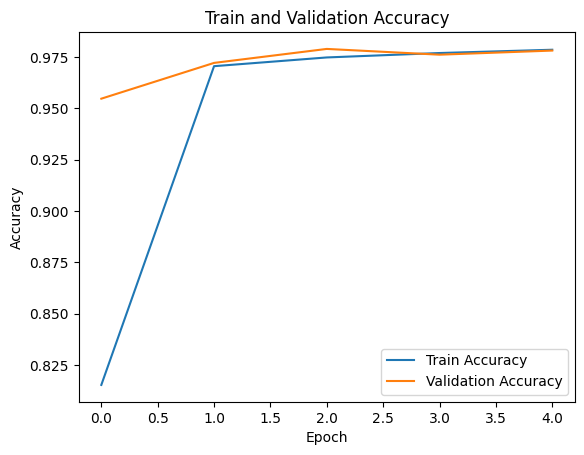

In [ ]:
# Plot the train and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the test set using cnn_model_3_1
y_test_pred_m3_1 = cnn_model_3_1.predict(test_generator)

# Convert the predictions from probabilities to class labels
y_test_pred_m3_1 = np.argmax(y_test_pred_m3_1, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = test_generator.classes

82/82 [==============================] - 6s 73ms/step


In [ ]:
# Accuracy
accuracy_cnn_model_3_1 = cnn_model_3_1.evaluate(test_generator, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_3_1[1])

82/82 [==============================] - 6s 67ms/step - loss: 0.0400 - accuracy: 0.9862

 Test_Accuracy:- 0.9861538410186768


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1300
           1       0.99      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



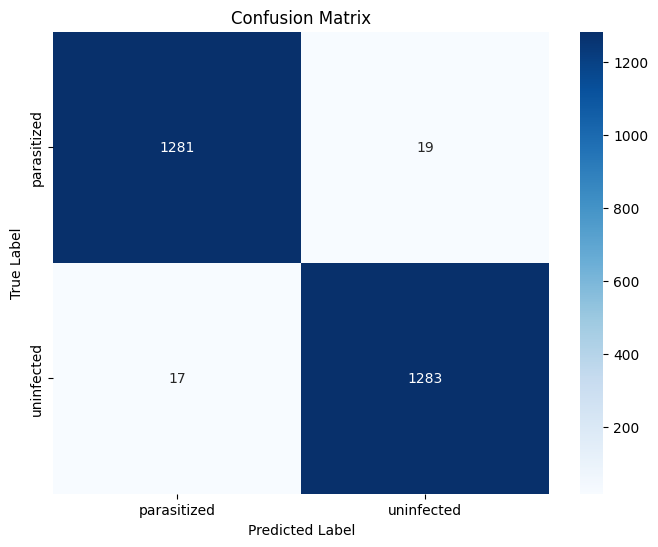

In [ ]:
# Plot classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_test_pred_m3_1))

# Plot confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_m3_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



## **Model 3.1 with Data Augmentation_sofmax+  HSV **

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Split the training data into training and validation sets
X_train_HSV, X_val_HSV, y_train, y_val = train_test_split(X_train_HSV, y_train, test_size=0.2, random_state=42)

In [ ]:
# Assuming y_train contains your labels
num_classes = len(np.unique(y_train))
num_classes

2

In [ ]:
# Assuming your labels are currently in categorical integer form
# Calculate the number of classes
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:

#BATCH_SIZE = 32


# Creating ImageDataGenerator with rotation, horizontal flipping, and contrast augmentation
datagen = ImageDataGenerator(
    rotation_range=40,            # Rotate images randomly by up to 40 degrees
    horizontal_flip=True,         # Flip images horizontally
    brightness_range=[0.5, 1.5],# Adjust brightness randomly between 0.5 and 1.5
    #shear_range=0.2,              # Shear the image by up to 20%
    #zoom_range=0.1,               # Zoom in or out by up to 20%
)

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator()

# Creating data generator for training data
train_generator = datagen.flow(
    X_train_HSV,y_train,
    batch_size=32,               # Number of images in each batch
    shuffle=True,                        # Shuffle the training data
    seed=42                              # Seed for reproducibility
)

# Creating data generator for validation data
validation_generator = datagen.flow(
    X_val_HSV,y_val,
    batch_size=32,               # Number of images in each batch
    shuffle=False                        # Do not shuffle the validation data
)
# Create data generator for test data
test_generator = test_datagen.flow(
    X_test_HSV,y_test,
    batch_size=32,               # Number of images in each batch
    shuffle=False                        # Do not shuffle the test data
)

In [ ]:
x, y = next(train_generator)
print(x.shape)  # Expected input shape
print(y.shape)  # Expected target shape

(32, 64, 64, 3)
(32, 2)


In [ ]:
def cnn_model_3_3():
    # Create a sequential model
    model = Sequential()

    # First Convolutional layer with 16 filters, kernel size 3x3, same padding, and input shape (64, 64, 3)
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional layer with 32 filters, kernel size 3x3, and same padding
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional layer with 64 filters, kernel size 3x3, and same padding
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer with 512 nodes and ReLU activation
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    # Output layer with two nodes and 'softmax' activation for binary classification
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the cnn_model_3 function and store the model in a new variable
cnn_model_3_3 = cnn_model_3_3()

# Print the summary of the model
cnn_model_3_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 64)          0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
history = cnn_model_3_3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callbacks,
    #class_weight={0:1, 1:2}  # Class weight for handling imbalance
)

Epoch 1/20
624/624 [==============================] - 150s 238ms/step - loss: 0.7672 - accuracy: 0.8707 - val_loss: 0.1808 - val_accuracy: 0.9431
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


624/624 [==============================] - 141s 226ms/step - loss: 0.1190 - accuracy: 0.9665 - val_loss: 0.1067 - val_accuracy: 0.9655
Epoch 3/20
624/624 [==============================] - 137s 219ms/step - loss: 0.1025 - accuracy: 0.9705 - val_loss: 0.0948 - val_accuracy: 0.9704
Epoch 4/20
624/624 [==============================] - 137s 220ms/step - loss: 0.0889 - accuracy: 0.9732 - val_loss: 0.0760 - val_accuracy: 0.9750
Epoch 5/20
624/624 [==============================] - 138s 221ms/step - loss: 0.0820 - accuracy: 0.9760 - val_loss: 0.0819 - val_accuracy: 0.9748
Epoch 6/20
624/624 [==============================] - 145s 232ms/step - loss: 0.0806 - accuracy: 0.9759 - val_loss: 0.0778 - val_accuracy: 0.9774


In [ ]:
# Accuracy
accuracy_cnn_model_3_3 = cnn_model_3_3.evaluate(test_generator, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_cnn_model_3_3[1])

82/82 [==============================] - 6s 72ms/step - loss: 0.0470 - accuracy: 0.9846

 Test_Accuracy:- 0.9846153855323792


In [ ]:
# Make predictions on the test set using model_0
y_test_pred_m3_3 = cnn_model_3_3.predict(test_generator)

# Convert the predictions from one-hot encoded to label format
y_test_pred_m3_3 = np.argmax(y_test_pred_m3_3, axis=1)

# Convert each entry of y_test to a single label
y_test_labels = np.argmax(y_test, axis=1)

82/82 [==============================] - 4s 51ms/step


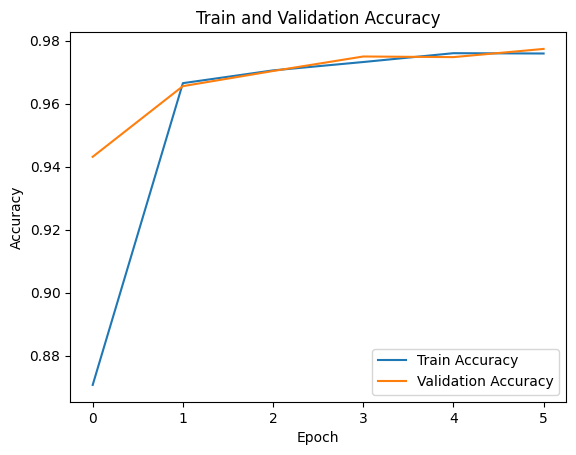

In [ ]:
# Plot the train and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



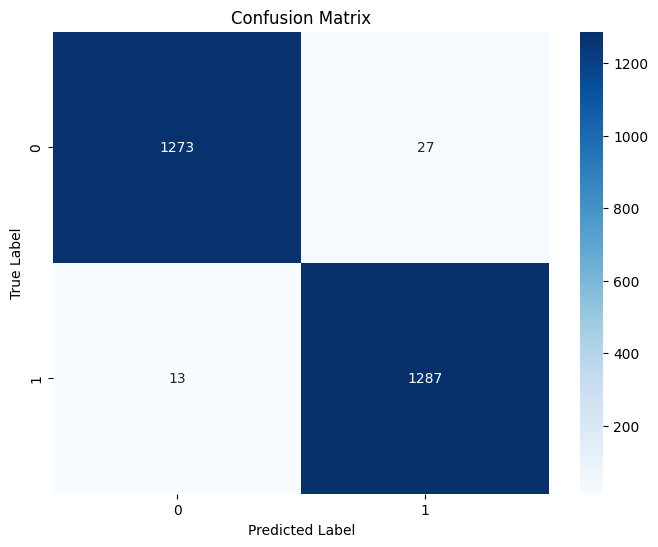

In [ ]:
# Plot classification report
print("Classification Report:")
print(classification_report(y_test_labels,y_test_pred_m3_3))

# Plot confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_m3_3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b>Compiling the model

In [ ]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras import optimizers

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model's layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=output)

# Define the optimizer with a learning rate of 0.001
adam = optimizers.Adam(learning_rate=0.001)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Print model summary
model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

<b> using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fit and train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=callbacks
)

Epoch 1/10
623/623 [==============================] - 87s 132ms/step - loss: 0.2486 - accuracy: 0.8988 - val_loss: 0.3046 - val_accuracy: 0.8798


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
623/623 [==============================] - 76s 123ms/step - loss: 0.1930 - accuracy: 0.9255 - val_loss: 0.2097 - val_accuracy: 0.9159
Epoch 3/10
623/623 [==============================] - 94s 150ms/step - loss: 0.1808 - accuracy: 0.9319 - val_loss: 0.2121 - val_accuracy: 0.9139
Epoch 4/10
623/623 [==============================] - 81s 130ms/step - loss: 0.1810 - accuracy: 0.9321 - val_loss: 0.2640 - val_accuracy: 0.8994


<b>Plot the train and validation accuracy

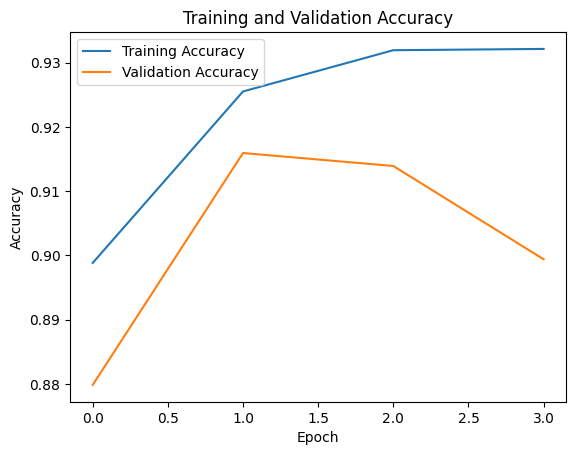

In [ ]:
# Plot the train and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Extract training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a DataFrame to display the accuracy values
accuracy_df = pd.DataFrame({'Epoch': range(1, len(train_accuracy) + 1),
                            'Train Accuracy': train_accuracy,
                            'Validation Accuracy': val_accuracy})

# Print the DataFrame
print(accuracy_df)

   Epoch  Train Accuracy  Validation Accuracy
0      1        0.898821             0.879839
1      2        0.925508             0.915927
2      3        0.931929             0.913911
3      4        0.932129             0.899395


###**Observations and insights: _____**

*   What can be observed from the validation and train curves?


##### The validation accuracy initially increases but decrease after a certain number of epochs. This behavior suggests that the model may begin to overfit the training data, as its performance on the validation set does not continue to improve despite improvements on the training set.

.

###<b> Evaluating the model

In [ ]:
# Generate predictions for the test data
test_pred = model.predict(test_generator)

# Convert probabilities to class labels
test_pred_labels = (test_pred > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes



82/82 [==============================] - 6s 68ms/step


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 4s 43ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1300
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



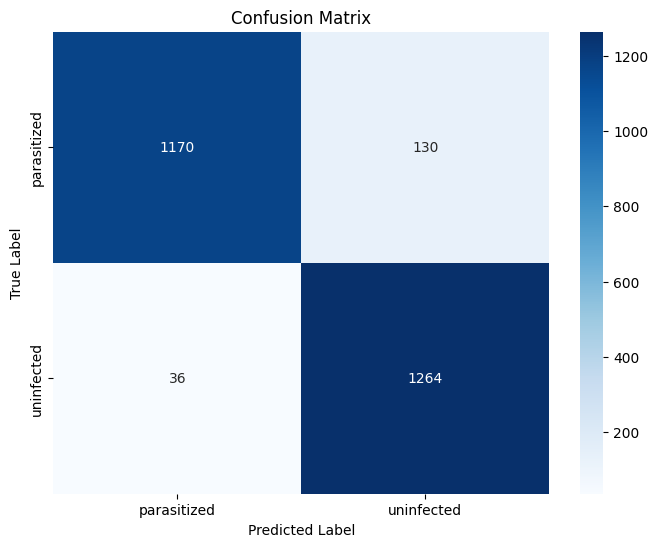

In [ ]:
# Generate predictions for the test data
test_pred = model.predict(test_generator)

# Convert probabilities to class labels
test_pred_labels = (test_pred > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Plot classification report
print("Classification Report:")
print(classification_report(true_labels, test_pred_labels))

# Plot confusion matrix
cm = confusion_matrix(true_labels, test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["parasitized", "uninfected"], yticklabels=["parasitized", "uninfected"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?


From the classification report and confusion matrix, we can draw the following observations and insights:

- The **overall accuracy of the model is 94%**, indicating that it correctly classifies the images into parasitized or uninfected categories 94% of the time.

- **For class 0 (parasitized)**, the **precision is 0.97**, indicating that 97% of the images predicted as parasitized are actually parasitized. The **recall is 0.90**, indicating that the model correctly identifies 90% of the parasitized images.
- **For class 1 (uninfected)**, the **precision is 0.91**, indicating that 91% of the images predicted as uninfected are actually uninfected. The **recall is 0.97**, indicating that the model correctly identifies 97% of the uninfected images.
- The **F1-score** is a harmonic mean of precision and recall, providing a balance between them. For both classes, the **F1-score is around 0.93-0.94**, indicating a reasenable balance between precision and recall.

-  The confusion matrix provides a detailed breakdown of the model's predictions versus the actual labels. From the confusion matrix, we can see that:

- Out of 1300 parasitized images, the **model correctly predicts 1170 (true positives)** and **incorrectly predicts 130 as uninfected (false negatives)**.
Out of 1300 uninfected images, the model correctly predicts **1264 (true negatives)** and incorrectly predicts **36 as parasitized (false positives).**


*  Choose the model with the best accuracy scores from all the above models and save it as a final model. **bold text**


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?

Model performance can often be improved by exploring different pre-trained models or using alternative convolutional neural network (CNN) architectures. For example:
- ResNet introduced residual connections, which alleviate the vanishing gradient problem and enable training of very deep neural networks. Its skip connections help in capturing fine-grained details and hierarchical features, making it suitable for malaria detection tasks.
- inception networks, particularly InceptionV3 and InceptionV4, employ multiple parallel convolutional pathways of different kernel sizes to capture features at different scales. They are efficient in terms of computational resources and have been widely used in medical image analysis.
-MobileNet is designed for mobile and embedded vision applications, offering lightweight architectures with fewer parameters and lower computational costs. MobileNetV2, in particular, has been used successfully in medical image analysis tasks with resource-constrained environments.


*  Converting RGB to HSV of Images has provided  a unique perspective on the presence of parasites within red blood cells, unveiling them as distinctively colored marks. This transformation might provide especially valuable in malaria detection.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?


1. The dataset consists of 24,958 training and 2,600 test images, with the number of images matching the number of labels, resulting in a balanced dataset.
2. Parasitized red blood cells (RBCs) exhibit a distinct purple-colored ring or oval structure, which is the parasite-affected region, suggesting a potential color-based detection approach.
3. Visualizing the mean image highlights a slight difference in color intensity between parasitized and uninfected samples, indicating the significance of color as a prominent feature for distinguishing between the two.
4.Converting RGB images to HSV provides a unique perspective on the presence of parasites within red blood cells, revealing them as distinctly colored marks.
5. Contrast augmentation enhances the visibility of subtle details in images, aiding in discerning important features related to infected cells, such as the presence of parasites within red blood cells.
6. Augmentation techniques like rotation, flipping, and color-based transformations (e.g., HSV conversion) may be more beneficial for malaria detection. These methods focus on preserving essential features like shape and color characteristics, crucial for accurate classification. Introducing variations in scale, rotation, and translation can further enhance model robustness and generalization performance.

These insights suggest that leveraging color-based features, utilizing contrast augmentation, and employing diverse augmentation techniques can improve the effectiveness of malaria detection models, especially when dealing with images of parasitized red blood cells.

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

* The model_0 dispalied best recall. Increasing deep of the convolutional layers while it performs better overall in terms of accuracy compared to model 0, the lower recall  is significant concern. LeakyReLU and batch normalization did not improve the model. Data augmentation(model 3) achived the highst   accuracy (98.61%) but lower recall than model 0. Pre-trained VGG16 model did not perform well.

* Data augmentation together with HSV conversion, could improve the performance of the  model. Also, exploring different pre-trained models or using alternative convolutional neural network (CNN) architectures

####**Proposal for the final solution design**:

Model 0 displayed the best recall and the best trade-off between recall and specificity. In medical diagnostics like malaria detection, the consequences of false negatives (infected cases classified as uninfected) and false positives (uninfected cases classified as infected) are not equal. False negatives can lead to untreated infections and severe health complications, while false positives can result in unnecessary treatments and resource wastage.

The model can potentially be improved by incorporating HSV conversion together with augmentation techniques. However, exploring different pre-trained models or using alternative convolutional neural network (CNN) architectures is also reasonable.

In [ ]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path = '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/ Malaria Detection based on the domain - Deep Learning/Reference_Notebook_Malaria_Detection_Full_Code.ipynb'
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(nb)

# Write the HTML output to a file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECTS/ Malaria Detection based on the domain - Deep Learning/Reference_Notebook_Malaria_Detection_Full_Code.html'
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write(body)